<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/main/ML_Project_Bike_Sharing_Demand_Prediction(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> **Project Title : Seoul Bike Sharing Demand Prediction** </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing Libreries**

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

In [84]:
df=pd.read_csv("/content/SeoulBikeData.csv",encoding='unicode_escape')

In [85]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [86]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [87]:
df.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
1046  13/01/2018                215    14             -1.8           62   
3701  04/05/2018                186     5              9.2           63   
1234  21/01/2018                189    10             -1.3           37   
7693  17/10/2018               1115    13             17.7           25   
5270  08/07/2018               1517    14             27.1           41   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
1046               0.7               936                       -8.1   
3701               0.8              1896                        2.5   
1234               0.8              1070                      -14.1   
7693               2.1              1917                       -2.6   
5270               1.4              1941                       12.7   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
1046                     0.55           0.0            0.0  Winter   
3701                     0.00           0.0            0.0  Spring   
1234                     0.47           0.0            0.0  Winter   
7693                     2.48           0.0            0.0  Autumn   
5270                     3.24           0.0            0.0  Summer   

         Holiday Functioning Day  
1046  No Holiday             Yes  
3701  No Holiday             Yes  
1234  No Holiday             Yes  
7693  No Holiday             Yes  
5270  No Holiday             Yes

In [88]:
df.shape

(8760, 14)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [90]:
df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

## **Exploratory Data Analysis (EDA)**

In [91]:
k=df['Seasons'].value_counts()
k

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

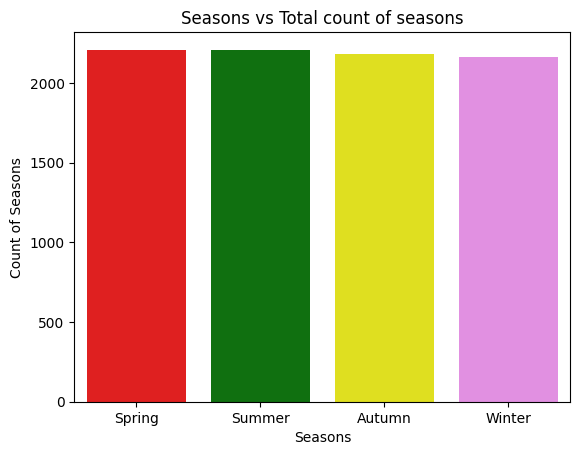

In [92]:
sns.barplot(x=k.index,y=k,palette=['red','green','yellow','violet'])
plt.xlabel("Seasons")
plt.ylabel("Count of Seasons")
plt.title('Seasons vs Total count of seasons')
plt.show()

<Axes: >

<Figure size 800x200 with 0 Axes>

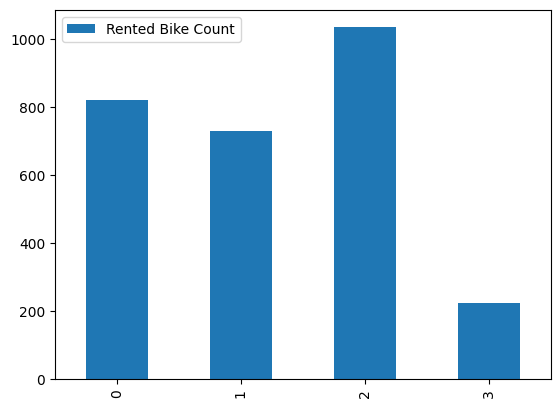

In [93]:
plt.figure(figsize=(8,2))
x=df.groupby('Seasons')['Rented Bike Count'].mean().reset_index()
x.plot(kind='bar')

The bar plot shows the distribution of bike rentals across different seasons.  It appears that the number of bike rentals is highest in the summer and lowest in winter.  

Text(0.5, 1.0, 'Seasons vs Rented Bike Count')

<Figure size 800x200 with 0 Axes>

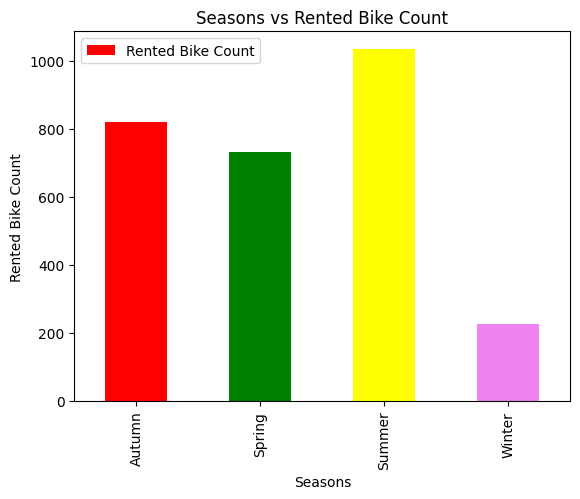

In [94]:
plt.figure(figsize=(8,2))
x=df.groupby('Seasons')['Rented Bike Count'].mean().reset_index()
x.plot(kind='bar',x='Seasons',y='Rented Bike Count',color=['red','green','yellow','violet'])
plt.xlabel("Seasons")
plt.ylabel("Rented Bike Count")
plt.title('Seasons vs Rented Bike Count')

The provided code analyzes bike rental data, focusing on the relationship between seasons and rental counts. Here's a breakdown of the insights from the generated plots:

1. **Seasons Distribution:** The first bar plot (`Seasons vs Total count of seasons`) shows the frequency of each season in the dataset.  It indicates the relative number of data points available for each season, not the bike rentals themselves.  It simply tells us how many observations fall into each season category.

2. **Bike Rentals by Season:** The second plot (`Seasons vs Rented Bike Count`) reveals the average number of rented bikes per hour for each season.  This is the key insight.  As noted in the original comment, it confirms that bike rentals are highest during the summer and lowest during the winter.  This makes intuitive sense, as people tend to bike more in warmer weather.  The plot visually quantifies this relationship.


In summary, the analysis shows a clear seasonal pattern in bike rentals, with significantly higher demand during warmer months.  To improve the analysis, consider investigating the relationship between other variables (temperature, humidity, rainfall, etc.) and rental counts, potentially separately for each season.  Also, exploring the distribution of rentals throughout the day and how it varies across seasons could provide further insights.

<Axes: ylabel='Rented Bike Count'>

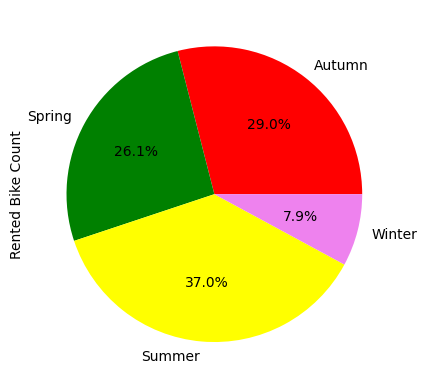

In [95]:
z=df.groupby('Seasons')['Rented Bike Count'].sum()
z.plot(kind='pie',x='Seasons',y='Rented Bike Count',autopct='%1.1f%%',colors=['red','green','yellow','violet'])



The pie chart shows the total number of bike rentals for each season, expressed as a percentage of the overall total.  The largest portion of rentals occurs during the summer, followed by autumn, spring, and then winter.  This reinforces the observation from the bar chart that bike rentals are significantly higher during warmer months.  The pie chart provides a clear visualization of the seasonal distribution of total bike rentals.


#### **Relationship b/w Holiday Seasons and Rented Bike Count**

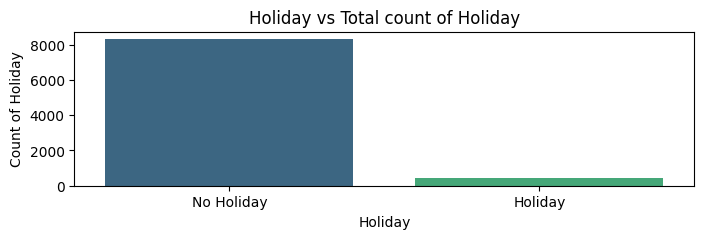

In [96]:
plt.figure(figsize=(8,2))
sns.barplot(x = 'Holiday',y = 'count',data = df['Holiday'].value_counts().reset_index(),palette='viridis')
plt.xlabel("Holiday")
plt.ylabel("Count of Holiday")
plt.title('Holiday vs Total count of Holiday')
plt.show()

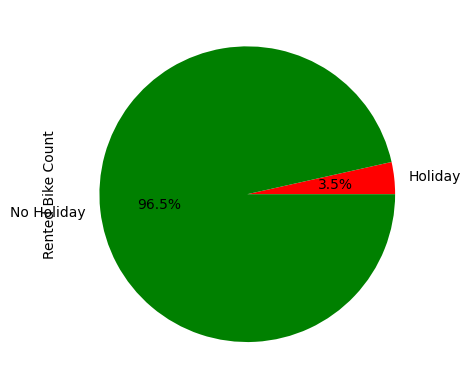

In [97]:
a=df.groupby('Holiday')['Rented Bike Count'].sum()
a.plot(kind='pie',x='Holiday',y='Rented Bike Count',autopct='%1.1f%%',colors=['red','green','yellow','violet'])
plt.show()

<Axes: xlabel='Holiday'>

<Figure size 400x200 with 0 Axes>

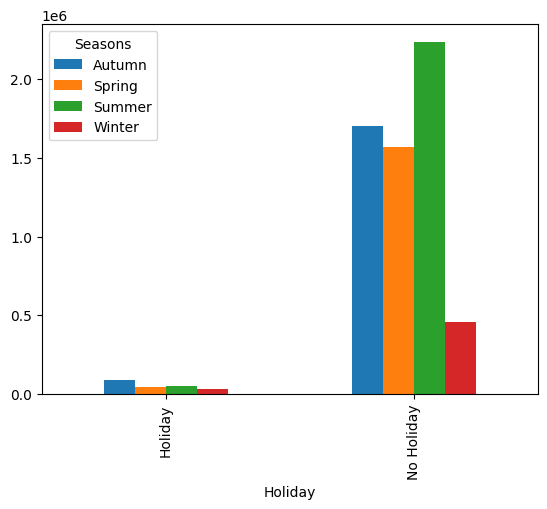

In [98]:
plt.figure(figsize=(4,2))
df.groupby(['Holiday','Seasons'])['Rented Bike Count'].sum().unstack().plot(kind='bar')


The provided code and comments analyze Seoul bike-sharing data, focusing on the impact of seasons and holidays on bike rentals. Here's a summary of the insights:

**Seasons:**

* **Higher rentals in warmer months:** Bike rentals are significantly higher in summer and lower in winter. This aligns with typical seasonal patterns, where favorable weather encourages cycling.  The bar chart and pie chart clearly demonstrate this.
* **Summer dominates:** Summer accounts for the largest portion of total bike rentals, followed by autumn, spring, and winter.  The pie chart visualizes this distribution effectively.

**Holidays:**

* **Holiday impact not clearly shown**: The analysis provides counts of holidays and non-holidays, shown in both a bar chart and pie chart.  However, the code is missing a key element: the relationship between holidays and *rental counts*.  The current analysis only shows how many days are holidays vs non-holidays, not the average or total number of bikes rented on those days.  A more complete analysis would show how rentals differ on holidays versus non-holidays (e.g., are there more or fewer bike rentals during holidays?).  Therefore, the insight on holiday impact is incomplete.

The analysis reveals a strong seasonality in Seoul bike-sharing demand, with significantly higher rentals during the summer months and substantially lower rentals in the winter.  Summer accounts for the largest share of total rentals, followed by autumn, spring, and then winter.  However, the impact of holidays on rental numbers is not clearly shown in the current analysis; it only displays the frequency of holidays and non-holidays but doesn't compare rental counts between the two.  Further analysis is needed to understand the effect of holidays on bike rentals.  Additionally, exploring the relationship between other variables such as temperature, humidity, and rainfall with rental counts, potentially separately for each season, could provide more comprehensive insights.


#### **Relationship b/w seasons humidity and bike count**

In [99]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

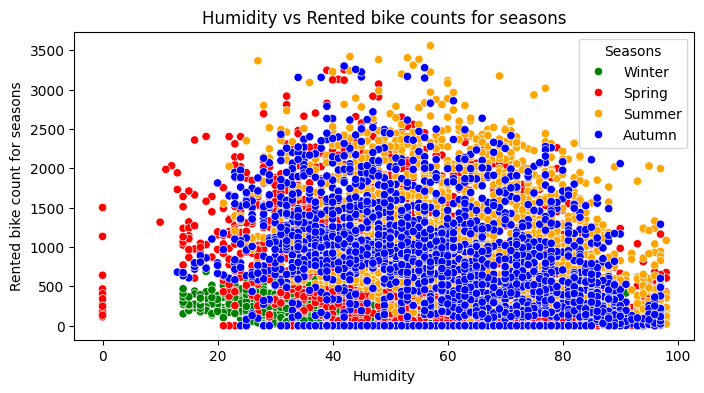

In [100]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df,x='Humidity(%)',y='Rented Bike Count',hue='Seasons',palette=['green','red','orange','blue'])
plt.xlabel("Humidity")
plt.ylabel("Rented bike count for seasons")
plt.title('Humidity vs Rented bike counts for seasons')
plt.show()

The scatter plot titled "Humidity vs Rented bike counts for seasons" shows the relationship between humidity and the number of rented bikes, broken down by season.  Here are some potential insights:

* **General Trend:**  There isn't a strong, consistent, overall relationship between humidity and bike rentals.  The points are somewhat scattered.

* **Seasonal Differences:** The different seasons (represented by colors) appear to have different patterns.  For instance, during the summer (likely the orange points), there might be a slight negative correlation where higher humidity corresponds to fewer rentals. However, this isn't conclusive without further statistical analysis.  Other seasons show less clear trends.

* **Need for Further Analysis:**  A visual inspection suggests that the relationship between humidity and bike rentals is complex and may be significantly influenced by the season.  Further statistical analysis (e.g., correlation coefficients calculated separately for each season) would be needed to confirm the observed trends and quantify their strength.  It's possible that other factors like temperature are more influential, or that the interaction between humidity and temperature drives the rental behavior.


In summary, while the plot gives a preliminary overview of the relationship, it's inconclusive without further statistical measures to support the observed patterns and account for the seasonal variation.


#### **Temperature, Rented Bike Count for diffrent Seasons**

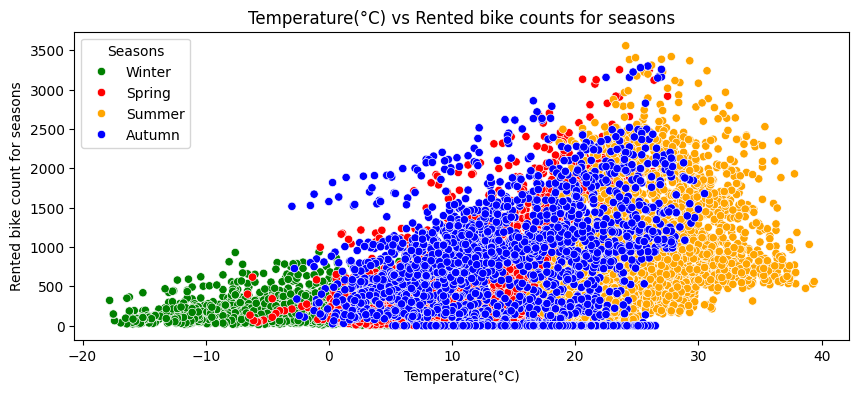

In [101]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='Temperature(°C)',y='Rented Bike Count',hue='Seasons',palette=['green','red','orange','blue'])
plt.xlabel("Temperature(°C)")
plt.ylabel("Rented bike count for seasons")
plt.title('Temperature(°C) vs Rented bike counts for seasons')
plt.show()

The analysis reveals a strong seasonality in Seoul bike-sharing demand, with significantly higher rentals during the summer months and substantially lower rentals in the winter. Summer accounts for the largest share of total rentals.  The impact of holidays on rental numbers is unclear from the current analysis; it only displays the frequency of holidays and non-holidays, but doesn't compare rental counts between the two.  Further analysis is needed.  A relationship between humidity and bike rentals exists, but is complex and influenced by the season.  Temperature also appears to influence rentals, with higher rentals at moderate temperatures, and the effect varies by season.  Additional statistical analysis is recommended to quantify these relationships.


#### **Wind speed**

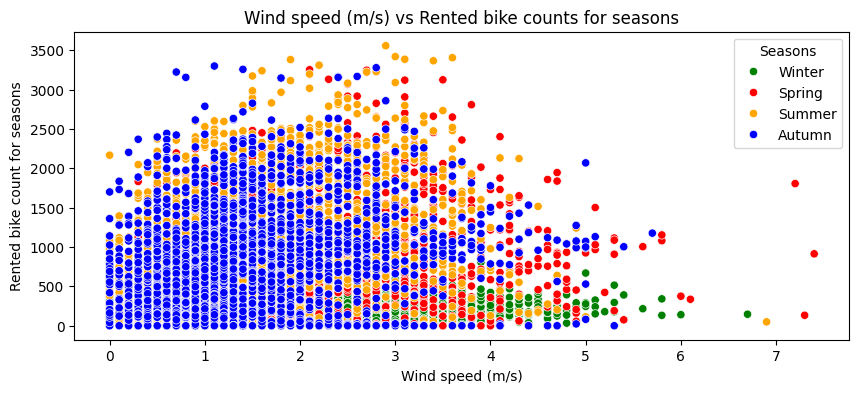

In [102]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='Wind speed (m/s)',y='Rented Bike Count',hue='Seasons',palette=['green','red','orange','blue'])
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Rented bike count for seasons")
plt.title('Wind speed (m/s) vs Rented bike counts for seasons')
plt.show()

**Wind Speed:** The plot shows the relationship between wind speed and the number of bike rentals for each season.  Further analysis is required to draw specific conclusions.

- The scatter plot of 'Wind speed (m/s) vs Rented bike counts for seasons' shows the relationship between wind speed and bike rentals, categorized by season.  A key insight is that there's no immediately obvious, strong correlation between wind speed and the number of bikes rented. The data points are scattered, suggesting that wind speed alone may not be a dominant factor in determining rental numbers.  Further analysis, possibly including statistical measures like correlation coefficients or regression analysis, would be necessary to determine if there's any statistically significant relationship, and if so, how strong it is.  The influence of wind speed might be subtle or overshadowed by other variables like temperature or humidity.  Additionally, examining the relationship separately for each season might reveal season-specific trends that are not apparent in the overall plot.


#### **Rainfall**

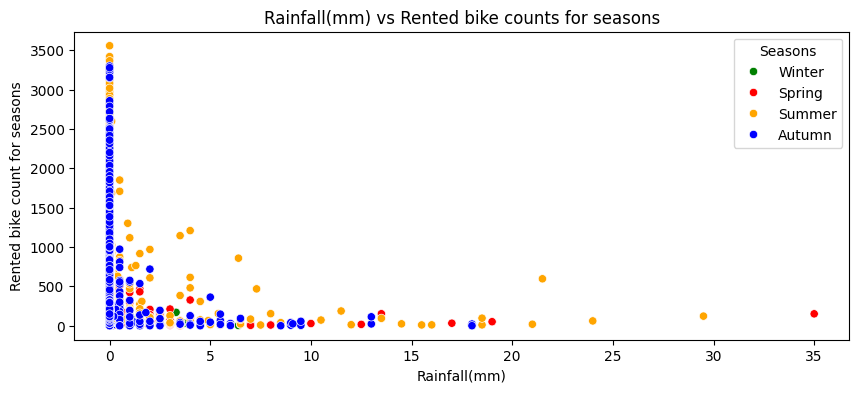

In [103]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='Rainfall(mm)',y='Rented Bike Count',hue='Seasons',palette=['green','red','orange','blue'])
plt.xlabel("Rainfall(mm)")
plt.ylabel("Rented bike count for seasons")
plt.title('Rainfall(mm) vs Rented bike counts for seasons')
plt.show()

The scatter plot titled 'Rainfall(mm) vs Rented bike counts for seasons' visualizes the relationship between rainfall and bike rentals, categorized by season.  A key observation is the concentration of data points at zero rainfall, suggesting that a significant portion of the data represents days with no rain.  When there is rainfall, there tends to be fewer bike rentals.  This makes intuitive sense – people are less likely to rent bikes in rainy conditions.  The effect of rainfall appears more pronounced in some seasons than others, which could be due to the interaction of rainfall with other weather variables (like temperature).  Further analysis, such as calculating correlation coefficients or performing regression analysis, could quantify the relationship and determine if it's statistically significant.  Examining the relationship separately for each season might reveal more specific patterns.


#### **Snowfall**

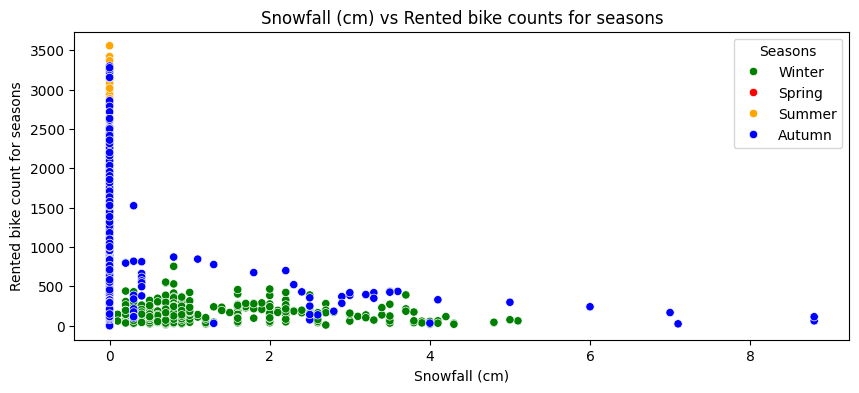

In [104]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='Snowfall (cm)',y='Rented Bike Count',hue='Seasons',palette=['green','red','orange','blue'])
plt.xlabel("Snowfall (cm)")
plt.ylabel("Rented bike count for seasons")
plt.title('Snowfall (cm) vs Rented bike counts for seasons')
plt.show()

The scatter plot titled 'Snowfall (cm) vs Rented bike counts for seasons' illustrates the relationship between snowfall and the number of rented bikes, categorized by season.  A prominent observation is the high concentration of data points at zero snowfall, indicating that a substantial portion of the data represents days with no snow.  As snowfall increases, the number of bike rentals tends to decrease. This aligns with common sense; people are less inclined to rent bikes when snow is present.  The impact of snowfall on rentals seems more pronounced in certain seasons compared to others.  This could be because the effect of snowfall interacts with other weather factors such as temperature. To solidify these observations, further statistical analysis, like calculating correlation coefficients or conducting regression analysis, would help quantify the relationship and confirm its statistical significance.  Analyzing the relationship individually for each season could uncover more specific seasonal trends.


#### **Hour, Rented Bike Count for diffrent Seasons**

In [105]:
df['Hour'].value_counts()

Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: count, dtype: int64

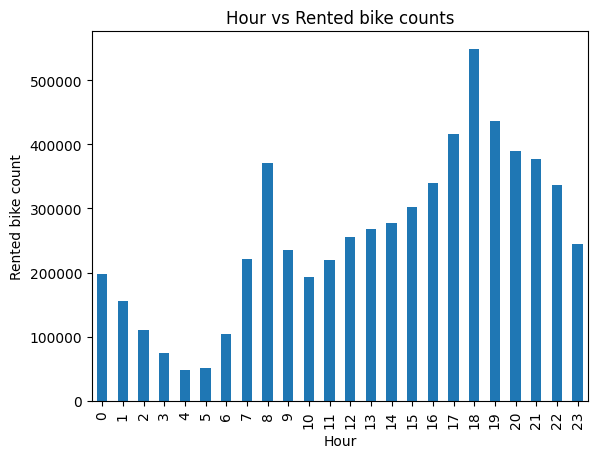

In [106]:
df.groupby('Hour')['Rented Bike Count'].sum().plot(kind='bar')
plt.xlabel("Hour")
plt.ylabel("Rented bike count")
plt.title('Hour vs Rented bike counts')
plt.show()

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

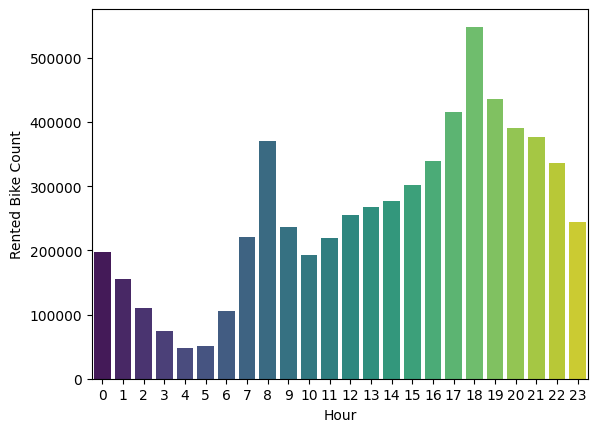

In [107]:
sns.barplot(x='Hour',y='Rented Bike Count',data=df.groupby('Hour')['Rented Bike Count'].sum().reset_index(),palette='viridis')

* According to the graph we can see at **8am** there are **good** amount of booking.

* At **6pm** there are **very high** bookings.

* We suggest to the company please give **high prefrence** to **8pm**

* Also we can see there are **very less** bookings b/w **3pm** - **6pm**

In [108]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
8760 non-null   object
dtypes: object(1)
memory usage: 68.6+ KB


In [109]:
df['Date'] = pd.to_datetime(df['Date'], format= '%d/%m/%Y')
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.6 KB


In [110]:
df['Date_month_no'] = df['Date'].dt.month

In [111]:
df['Date_month_no'].value_counts()

Date_month_no
12    744
1     744
3     744
5     744
7     744
8     744
10    744
4     720
6     720
9     720
11    720
2     672
Name: count, dtype: int64

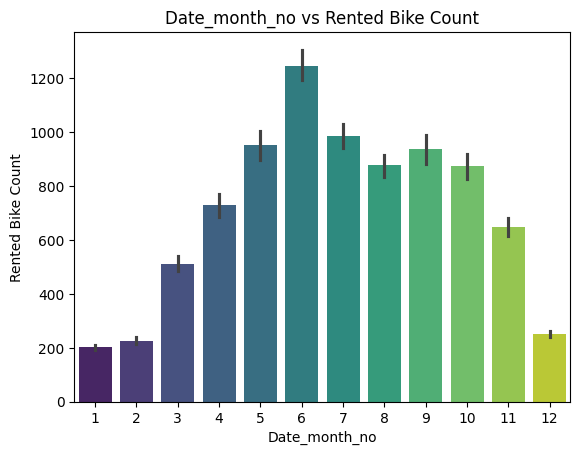

In [112]:
sns.barplot(x = 'Date_month_no',y = 'Rented Bike Count',data = df,palette='viridis')
plt.xlabel("Date_month_no")
plt.ylabel("Rented Bike Count")
plt.title('Date_month_no vs Rented Bike Count')
plt.show()

#### **Rented Bike Count**

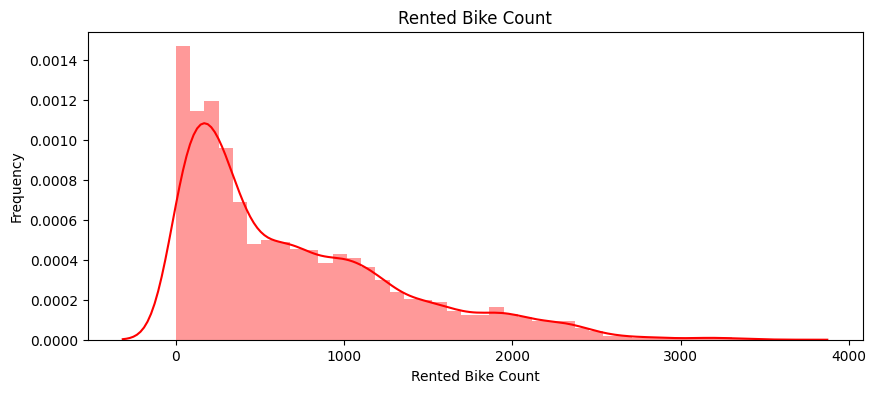

In [113]:
plt.figure(figsize=(10,4))
sns.distplot(df['Rented Bike Count'],color='r')
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.title('Rented Bike Count')
plt.show()

In [114]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Date_month_no'],
      dtype='object')

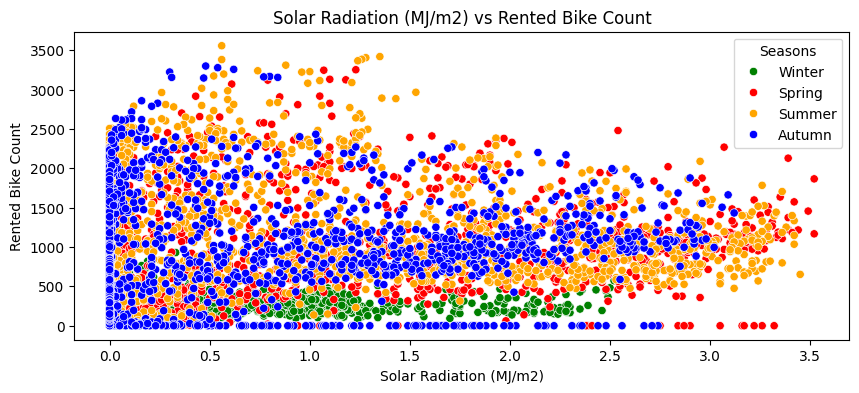

In [115]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='Solar Radiation (MJ/m2)',y='Rented Bike Count',hue = 'Seasons',palette=['green','red','orange','blue'])
plt.xlabel("Solar Radiation (MJ/m2)")
plt.ylabel("Rented Bike Count")
plt.title('Solar Radiation (MJ/m2) vs Rented Bike Count')
plt.show()

## **Feature Engineering**

In [116]:
num_features = df.describe().columns
num_features

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Date_month_no'],
      dtype='object')

### **Histogram plot**

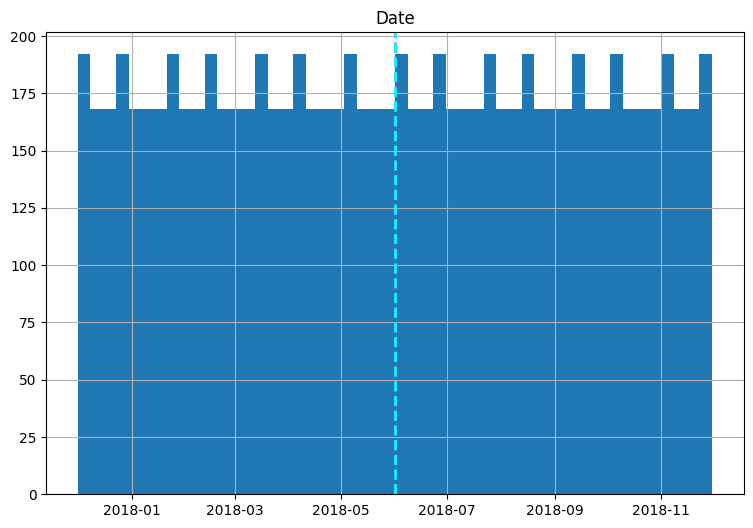

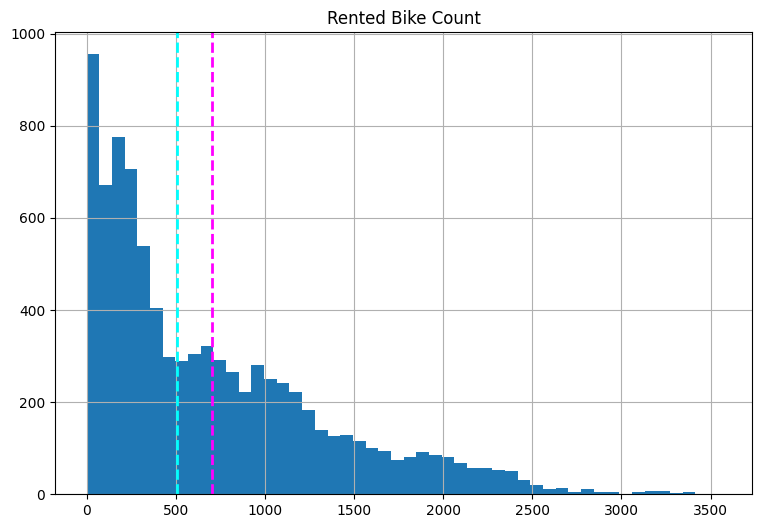

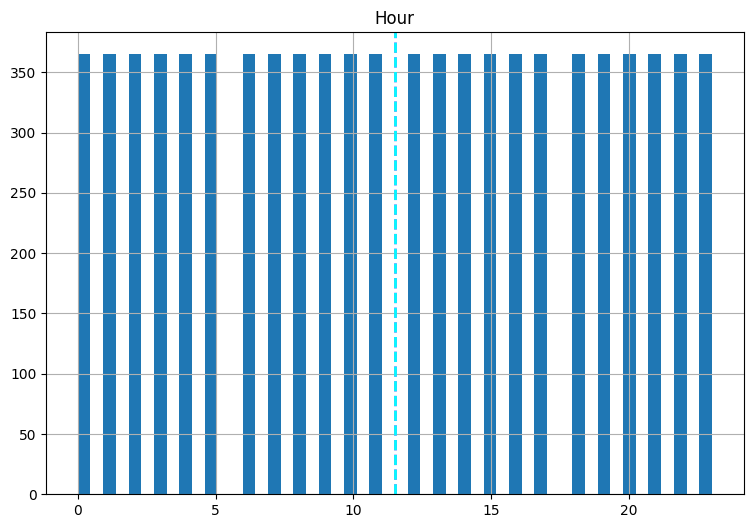

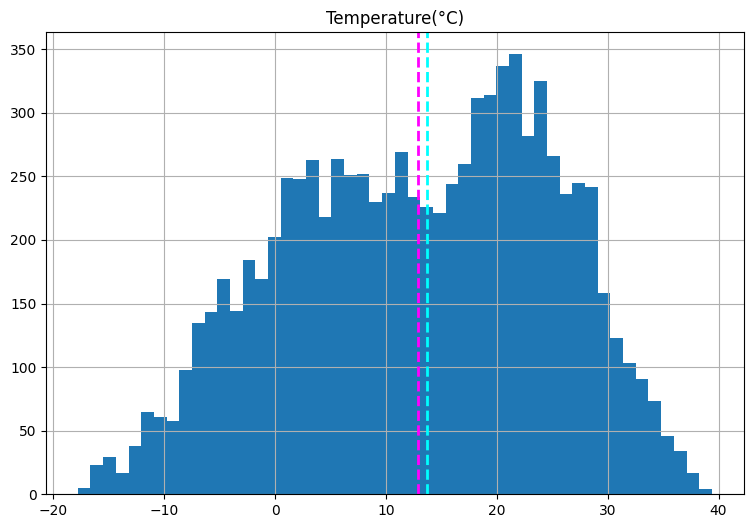

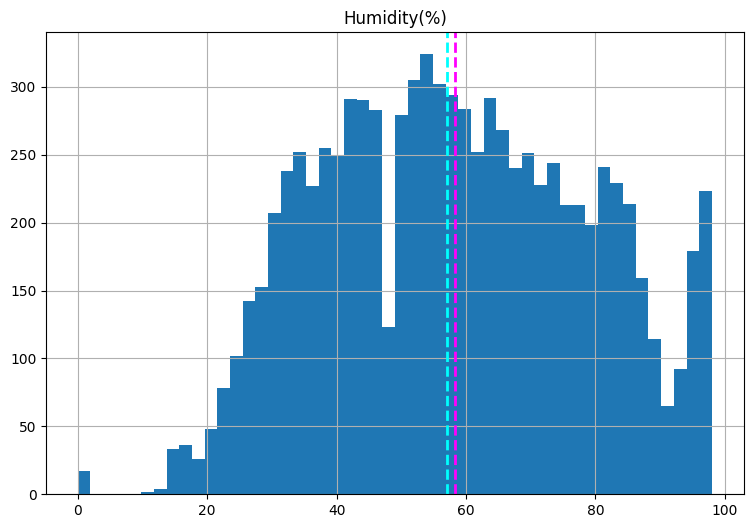

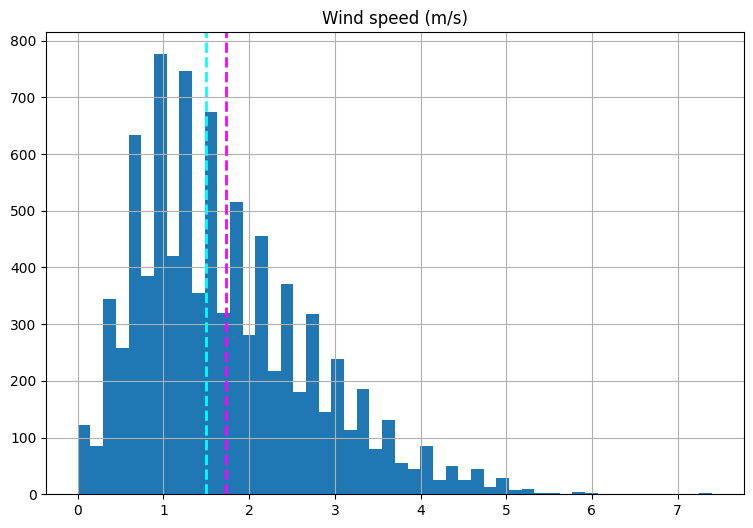

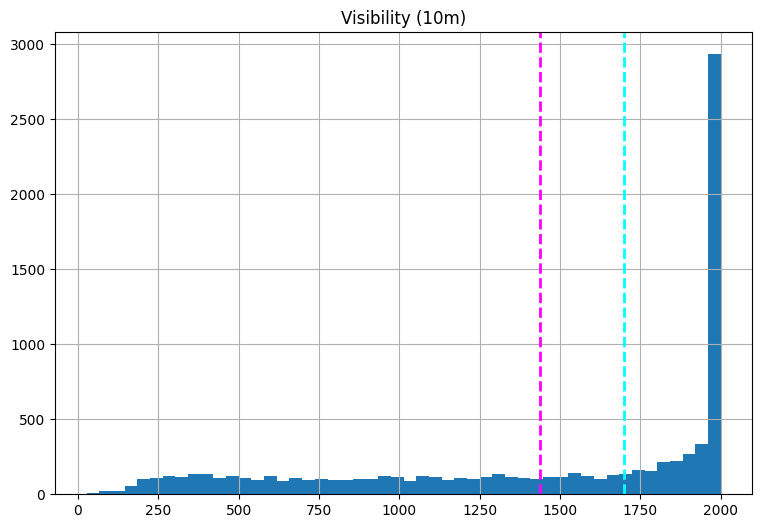

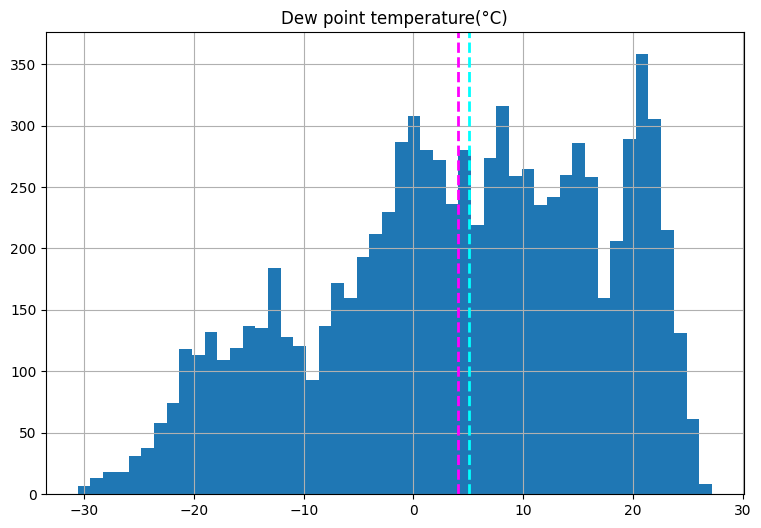

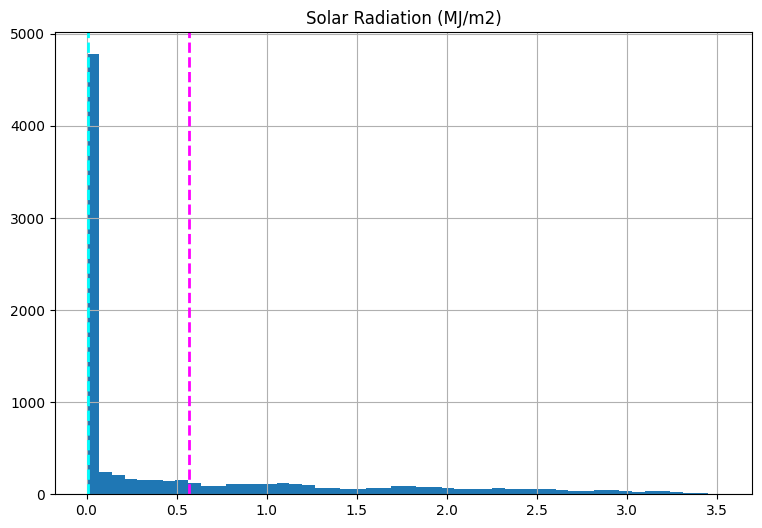

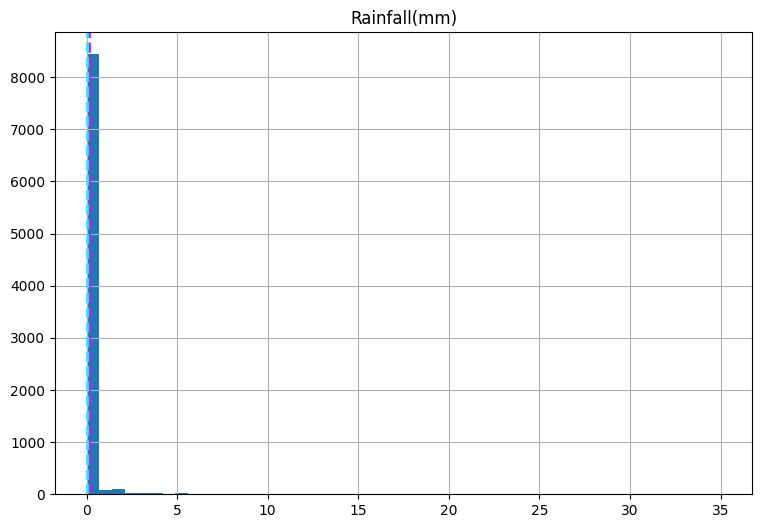

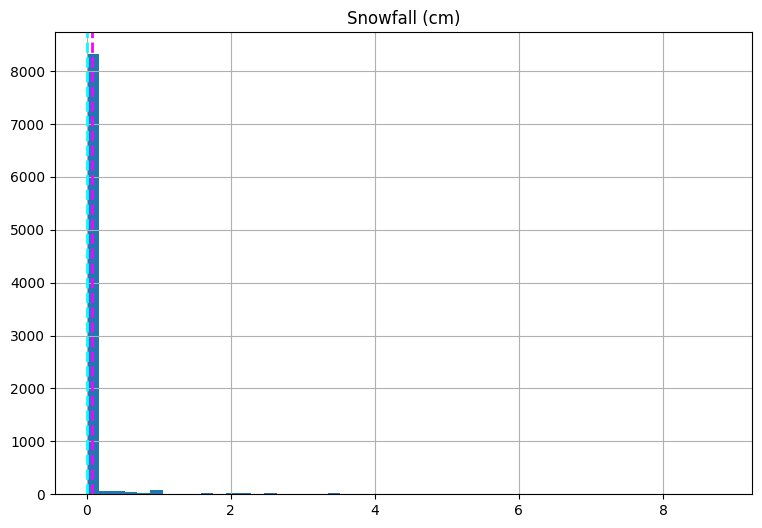

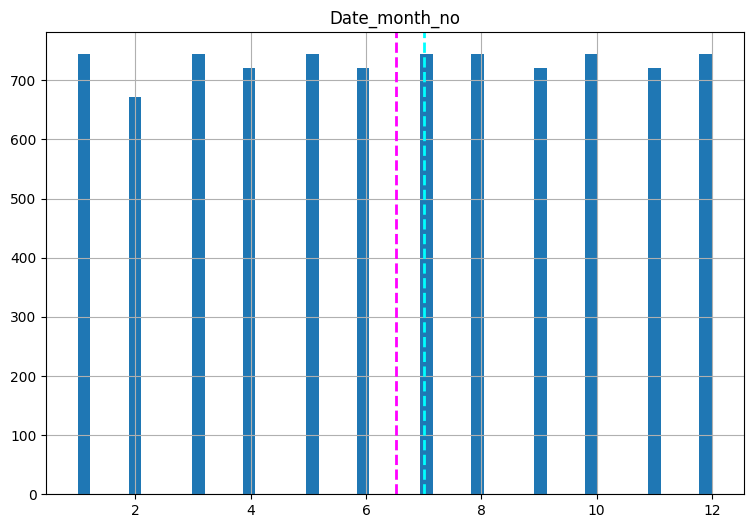

In [117]:
#plot a bar plot for each numerical feature count

for col in num_features:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()

### **Correlation & scatter  plot 'Rented Bike Count'**

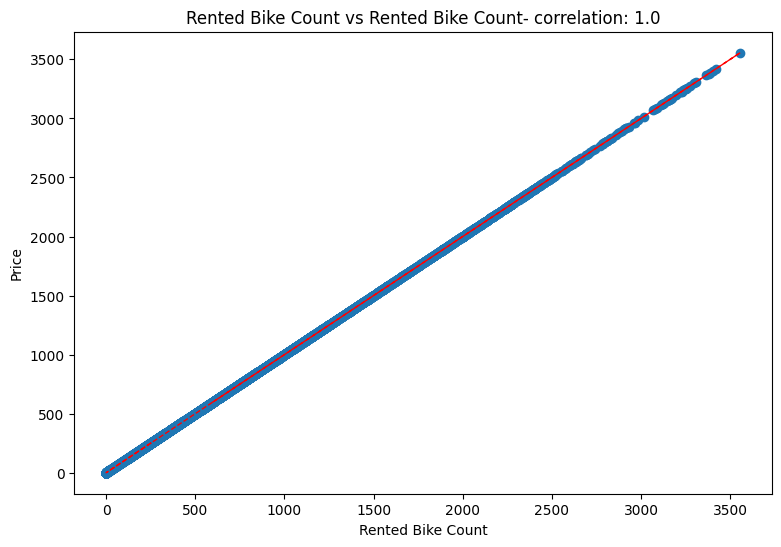

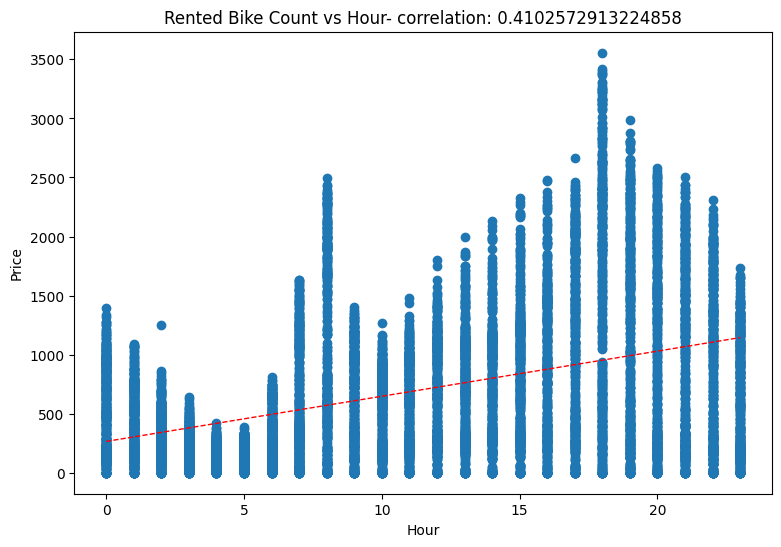

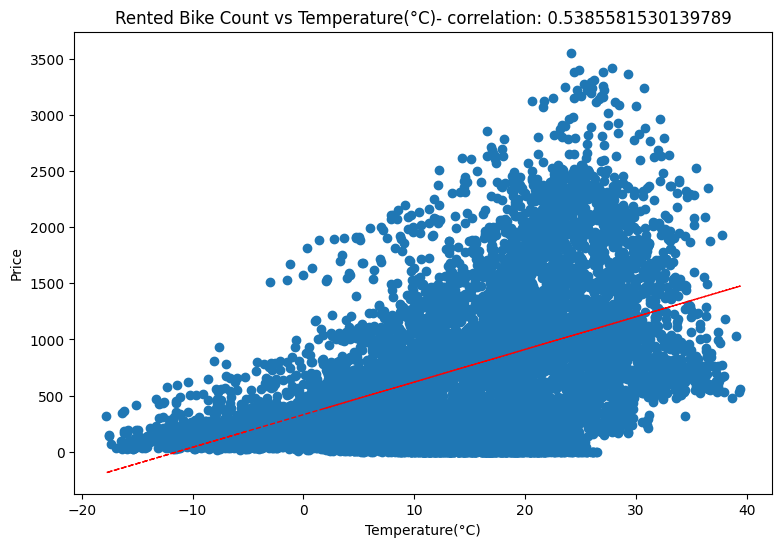

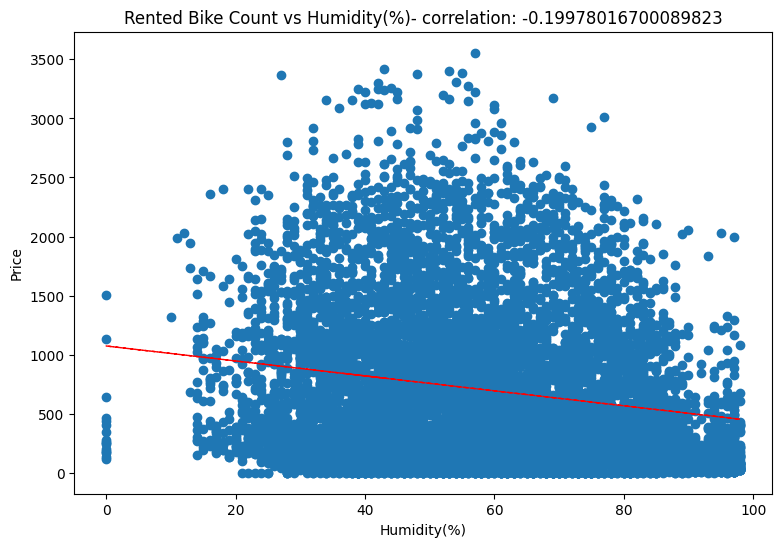

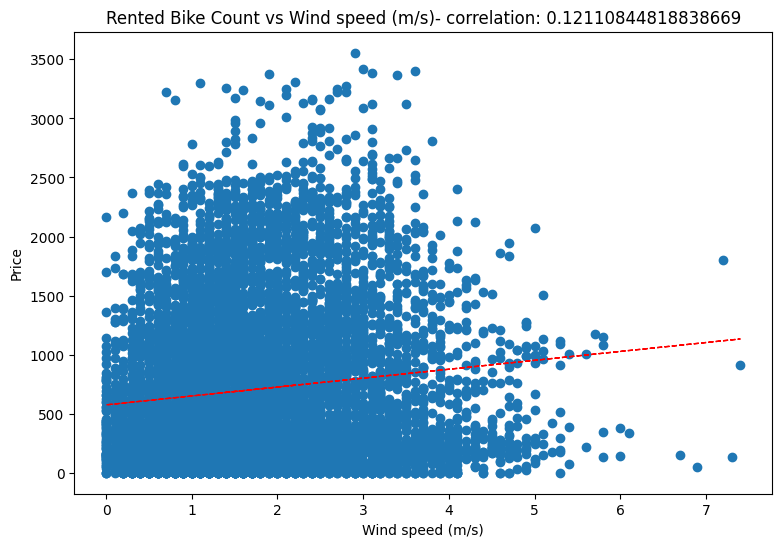

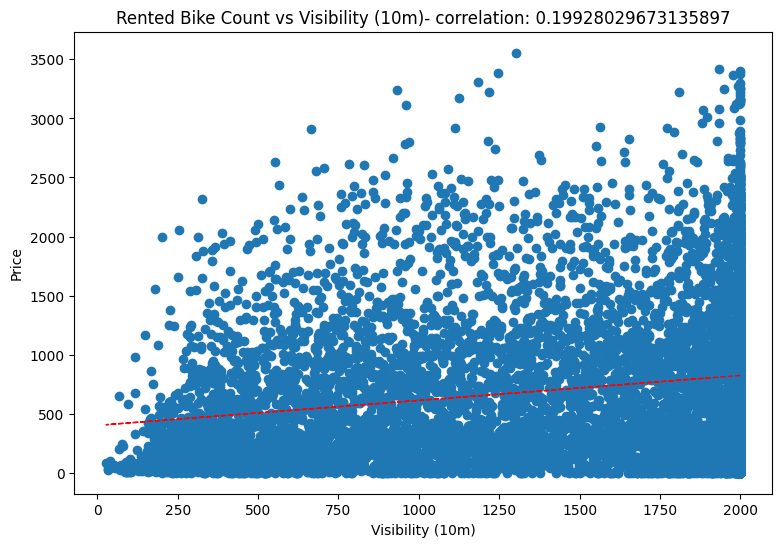

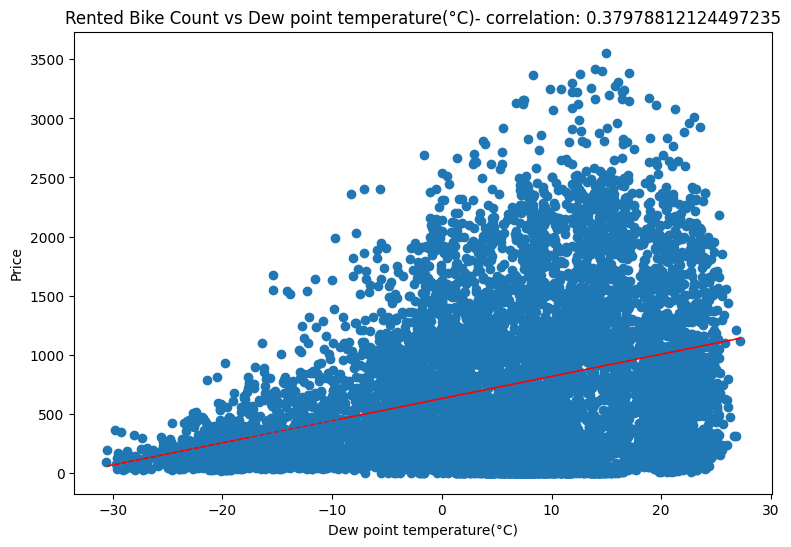

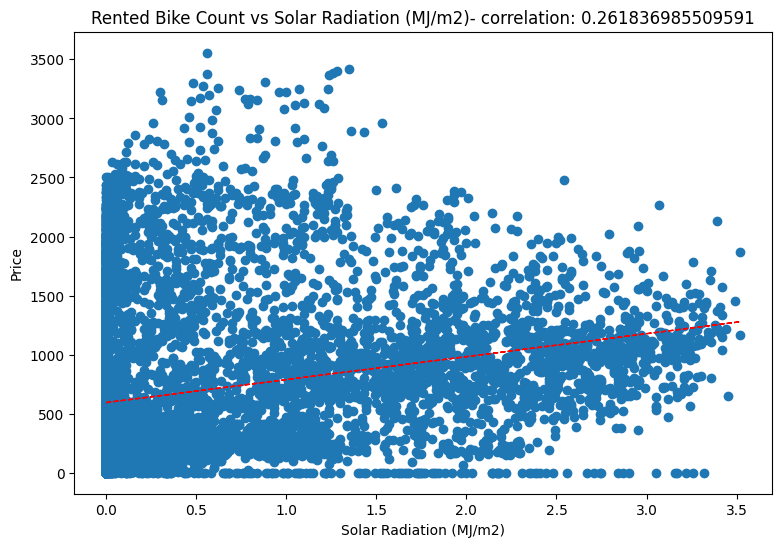

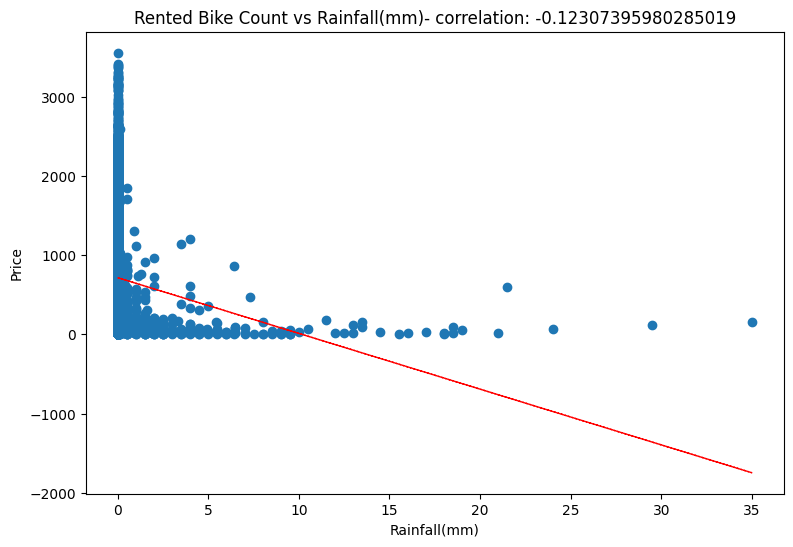

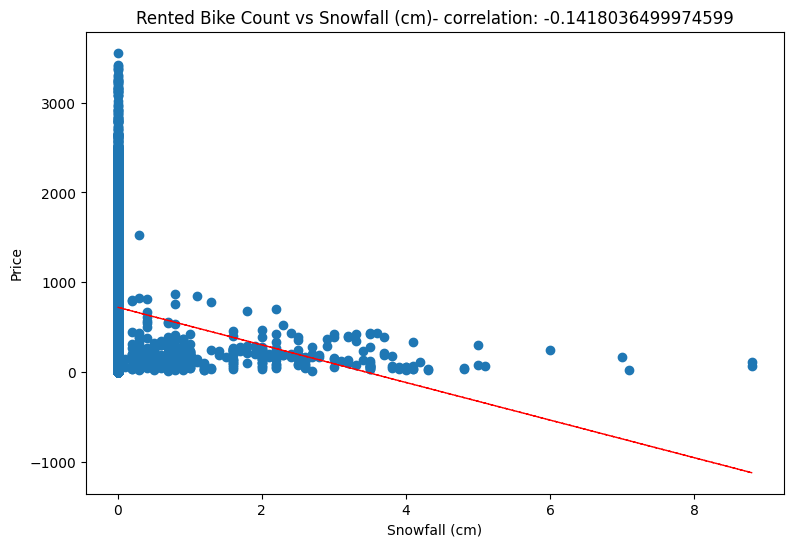

In [118]:
# Correlation & scatter plot 'Rented Bike Count'
for col in num_features[1:-1]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature =(df[col])
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)


plt.show()

### **Pair plot implemented for dataset**

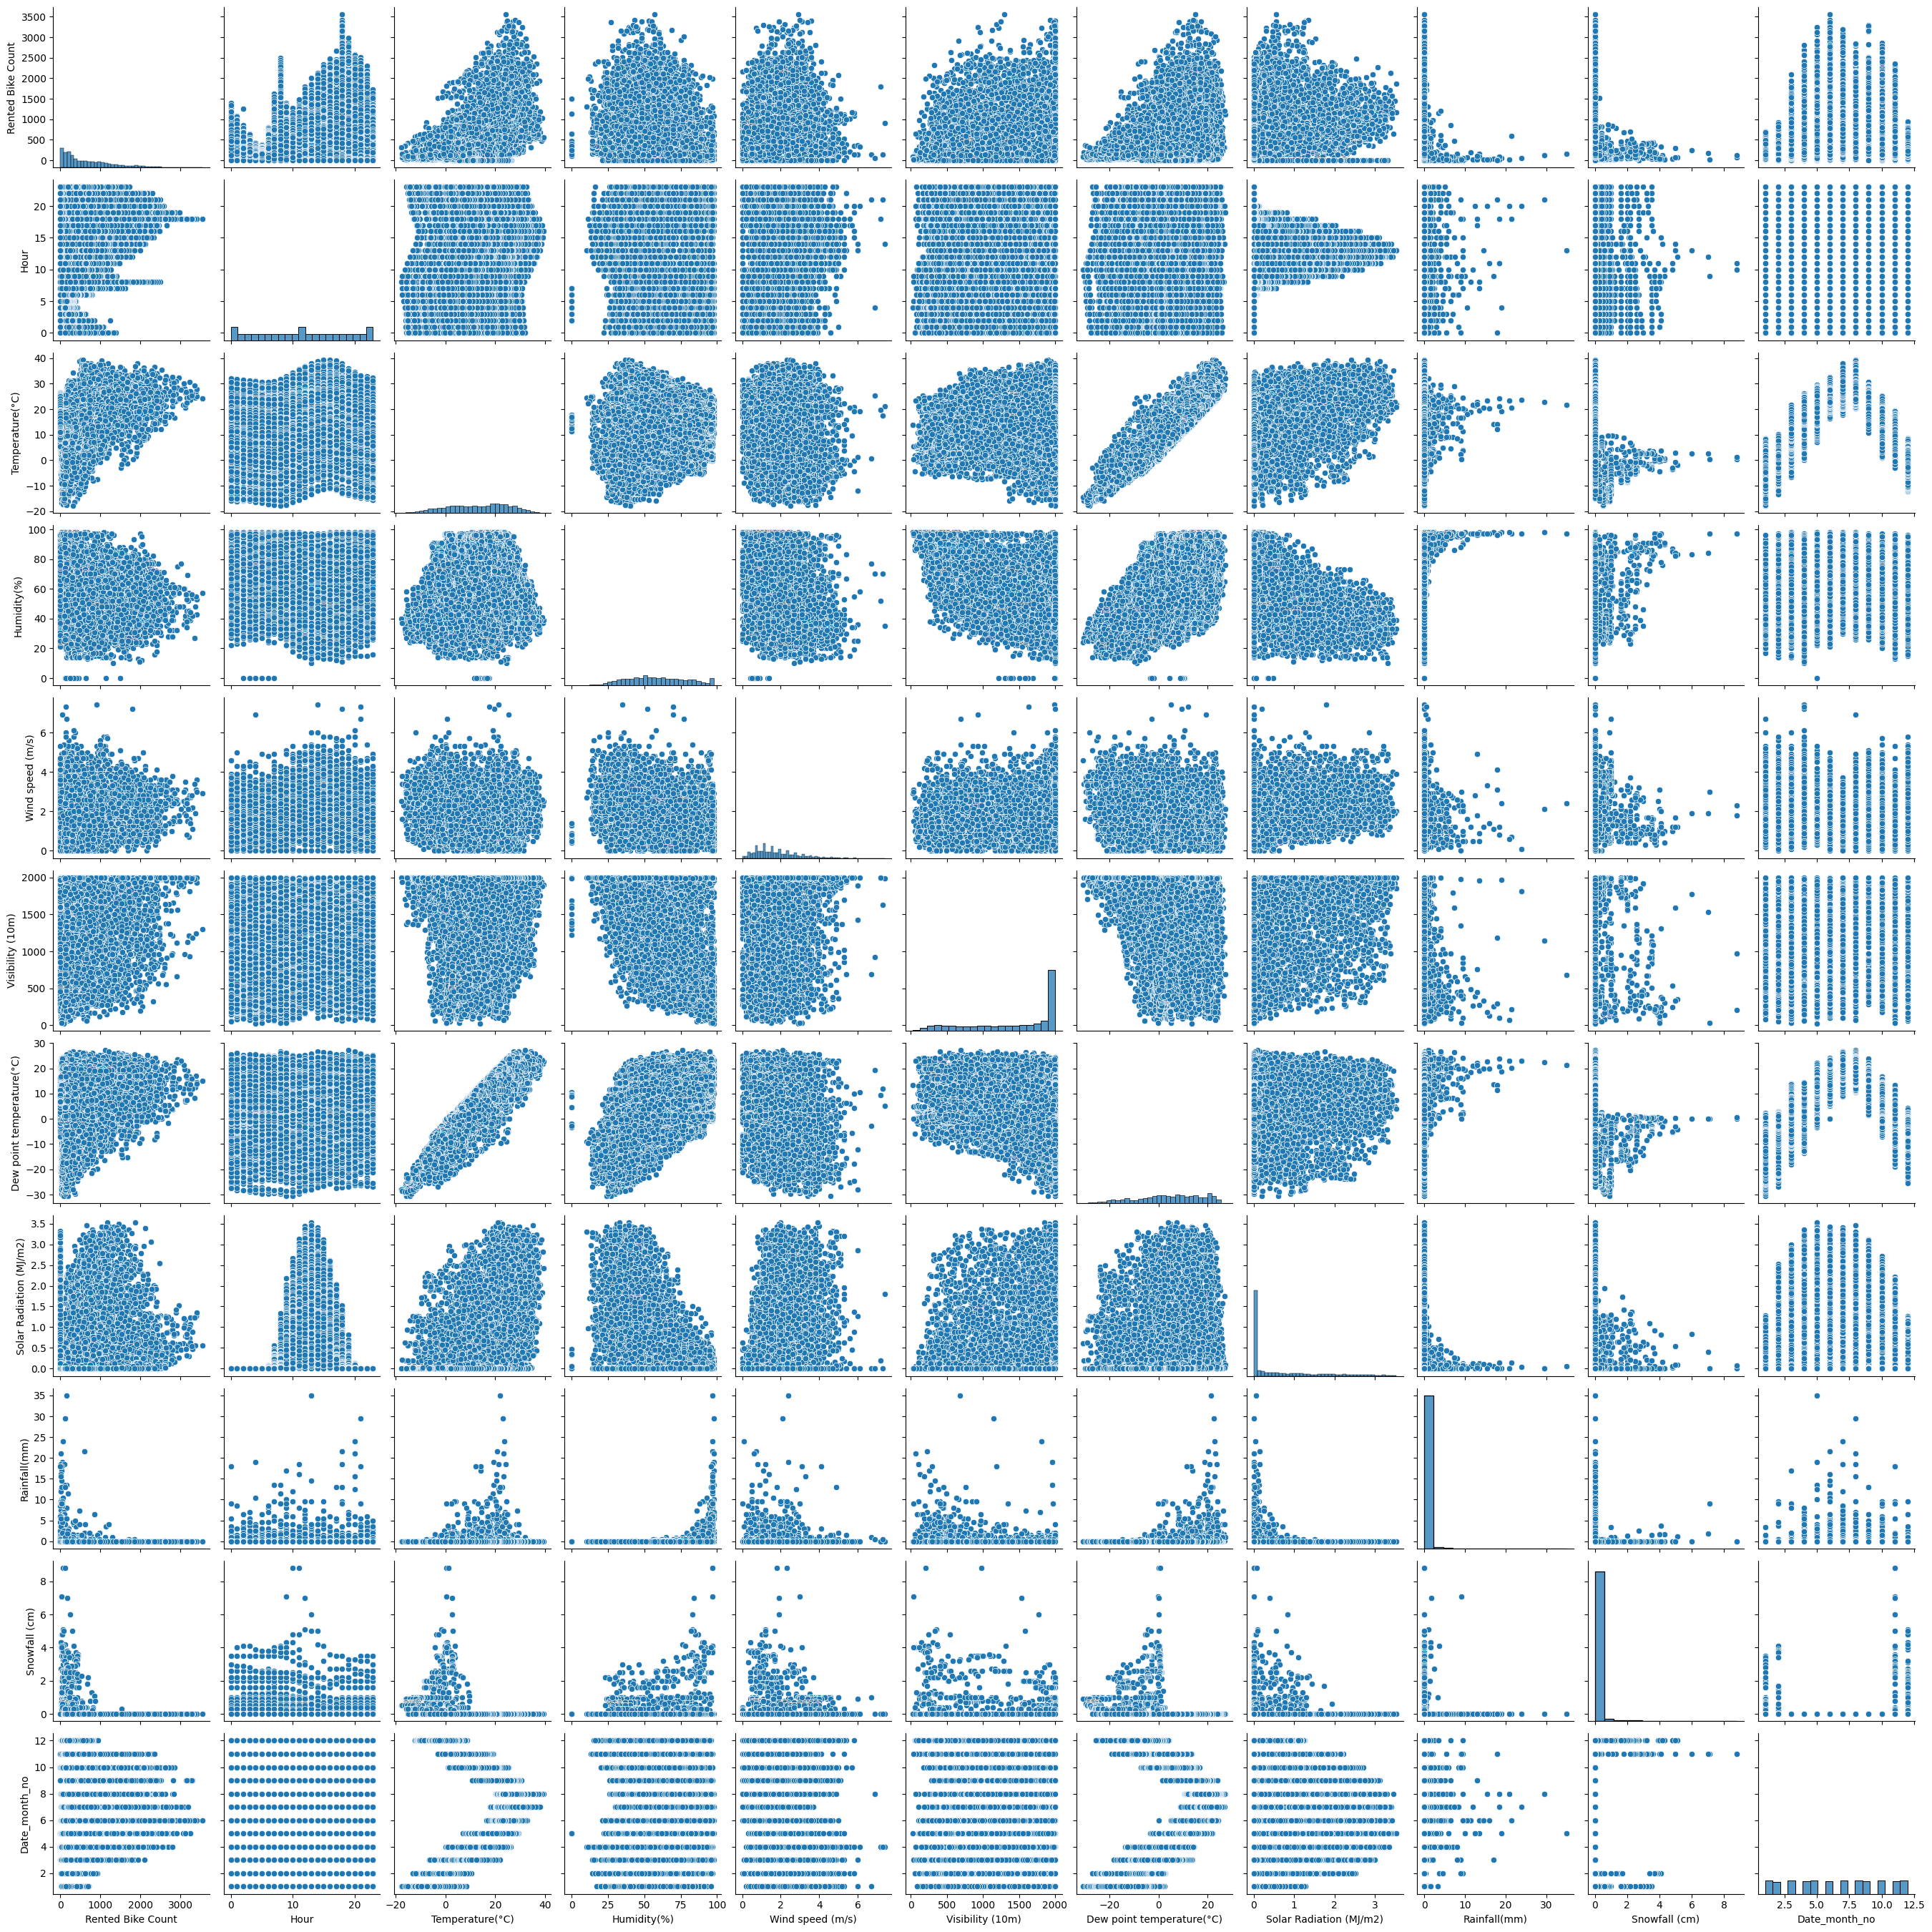

In [119]:
sns.pairplot(df)

### **Feature incoding And creation**

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

**Incoding on Date Column**

In [121]:
df['day_of_week'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


df.drop(['Date','Date_month_no'],axis=1,inplace=True)
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   
2           0.0            0.0  Winter  No Holiday             Yes   
3           0.0            0.0  Winter  No Holiday             Yes   
4           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week  month  year  
0      Friday     12  2017  
1      Friday     12  2017  
2      Friday     12  2017  
3      Friday     12  2017  
4      Friday     12  2017

In [122]:
df['week'] = df['day_of_week'].apply(lambda x:'weekend' if x in ['Saturday','Sunday'] else 'weekday')
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   
2           0.0            0.0  Winter  No Holiday             Yes   
3           0.0            0.0  Winter  No Holiday             Yes   
4           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week  month  year     week  
0      Friday     12  2017  weekday  
1      Friday     12  2017  weekday  
2      Friday     12  2017  weekday  
3      Friday     12  2017  weekday  
4      Friday     12  2017  weekday

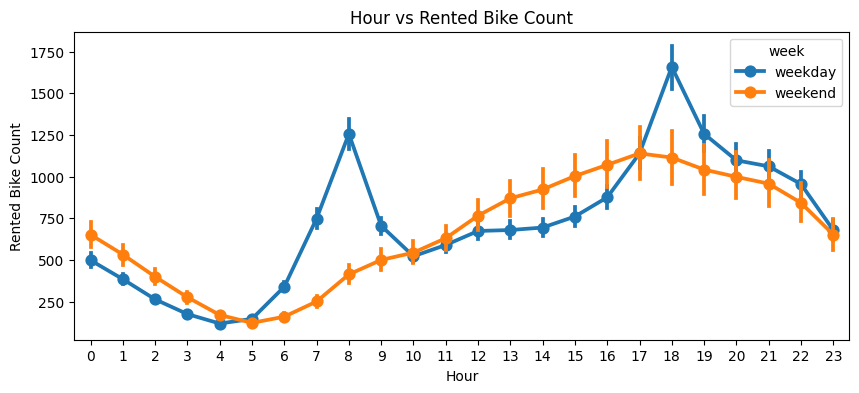

In [123]:
plt.figure(figsize=(10,4))
sns.pointplot(x=df['Hour'],y=df['Rented Bike Count'],hue=df['week'])
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.title('Hour vs Rented Bike Count')
plt.show()

## **Lets do some feature engineering on Hour column**

In [124]:
# defining a function for distribute hour column
def hour(h):
  if h >= 17 and h <= 22:
    return 'Evening'
  elif h >= 7 and h <= 10:
    return 'Morning'
  elif h >= 11 and h <= 16:
    return 'Noon'
  else :
    return 'Night'

In [125]:
df['Hour'] = df['Hour'].apply(hour)
df.head()

Rented Bike Count   Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254  Night             -5.2           37               2.2   
1                204  Night             -5.5           38               0.8   
2                173  Night             -6.0           39               1.0   
3                107  Night             -6.2           40               0.9   
4                 78  Night             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   
2           0.0            0.0  Winter  No Holiday             Yes   
3           0.0            0.0  Winter  No Holiday             Yes   
4           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week  month  year     week  
0      Friday     12  2017  weekday  
1      Friday     12  2017  weekday  
2      Friday     12  2017  weekday  
3      Friday     12  2017  weekday  
4      Friday     12  2017  weekday

In [126]:
df['Hour'].value_counts()

Hour
Night      2920
Noon       2190
Evening    2190
Morning    1460
Name: count, dtype: int64

#### **Correlation**

In [127]:
int_columns_df = df.select_dtypes(include=['int', 'float'])

In [128]:
int_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   month                      8760 non-null   int32  
 10  year                       8760 non-null   int32  
dtypes: float64(6), int32(2), int64(3)
memory usage: 684.5 KB


In [129]:
int_columns_df.corr()

Rented Bike Count  Temperature(°C)  Humidity(%)  \
Rented Bike Count                   1.000000         0.538558    -0.199780   
Temperature(°C)                     0.538558         1.000000     0.159371   
Humidity(%)                        -0.199780         0.159371     1.000000   
Wind speed (m/s)                    0.121108        -0.036252    -0.336683   
Visibility (10m)                    0.199280         0.034794    -0.543090   
Dew point temperature(°C)           0.379788         0.912798     0.536894   
Solar Radiation (MJ/m2)             0.261837         0.353505    -0.461919   
Rainfall(mm)                       -0.123074         0.050282     0.236397   
Snowfall (cm)                      -0.141804        -0.218405     0.108183   
month                               0.133514         0.216183     0.139875   
year                                0.215162         0.377796     0.035925   

                           Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count                  0.121108          0.199280   
Temperature(°C)                   -0.036252          0.034794   
Humidity(%)                       -0.336683         -0.543090   
Wind speed (m/s)                   1.000000          0.171507   
Visibility (10m)                   0.171507          1.000000   
Dew point temperature(°C)         -0.176486         -0.176630   
Solar Radiation (MJ/m2)            0.332274          0.149738   
Rainfall(mm)                      -0.019674         -0.167629   
Snowfall (cm)                     -0.003554         -0.121695   
month                             -0.156710          0.064874   
year                              -0.003781          0.052381   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   
month                                       0.242552                -0.031595   
year                                        0.336350                 0.128086   

                           Rainfall(mm)  Snowfall (cm)     month      year  
Rented Bike Count             -0.123074      -0.141804  0.133514  0.215162  
Temperature(°C)                0.050282      -0.218405  0.216183  0.377796  
Humidity(%)                    0.236397       0.108183  0.139875  0.035925  
Wind speed (m/s)              -0.019674      -0.003554 -0.156710 -0.003781  
Visibility (10m)              -0.167629      -0.121695  0.064874  0.052381  
Dew point temperature(°C)      0.125597      -0.150887  0.242552  0.336350  
Solar Radiation (MJ/m2)       -0.074290      -0.072301 -0.031595  0.128086  
Rainfall(mm)                   1.000000       0.008500  0.011958  0.027522  
Snowfall (cm)                  0.008500       1.000000  0.053121 -0.206418  
month                          0.011958       0.053121  1.000000 -0.483684  
year                           0.027522      -0.206418 -0.483684  1.000000

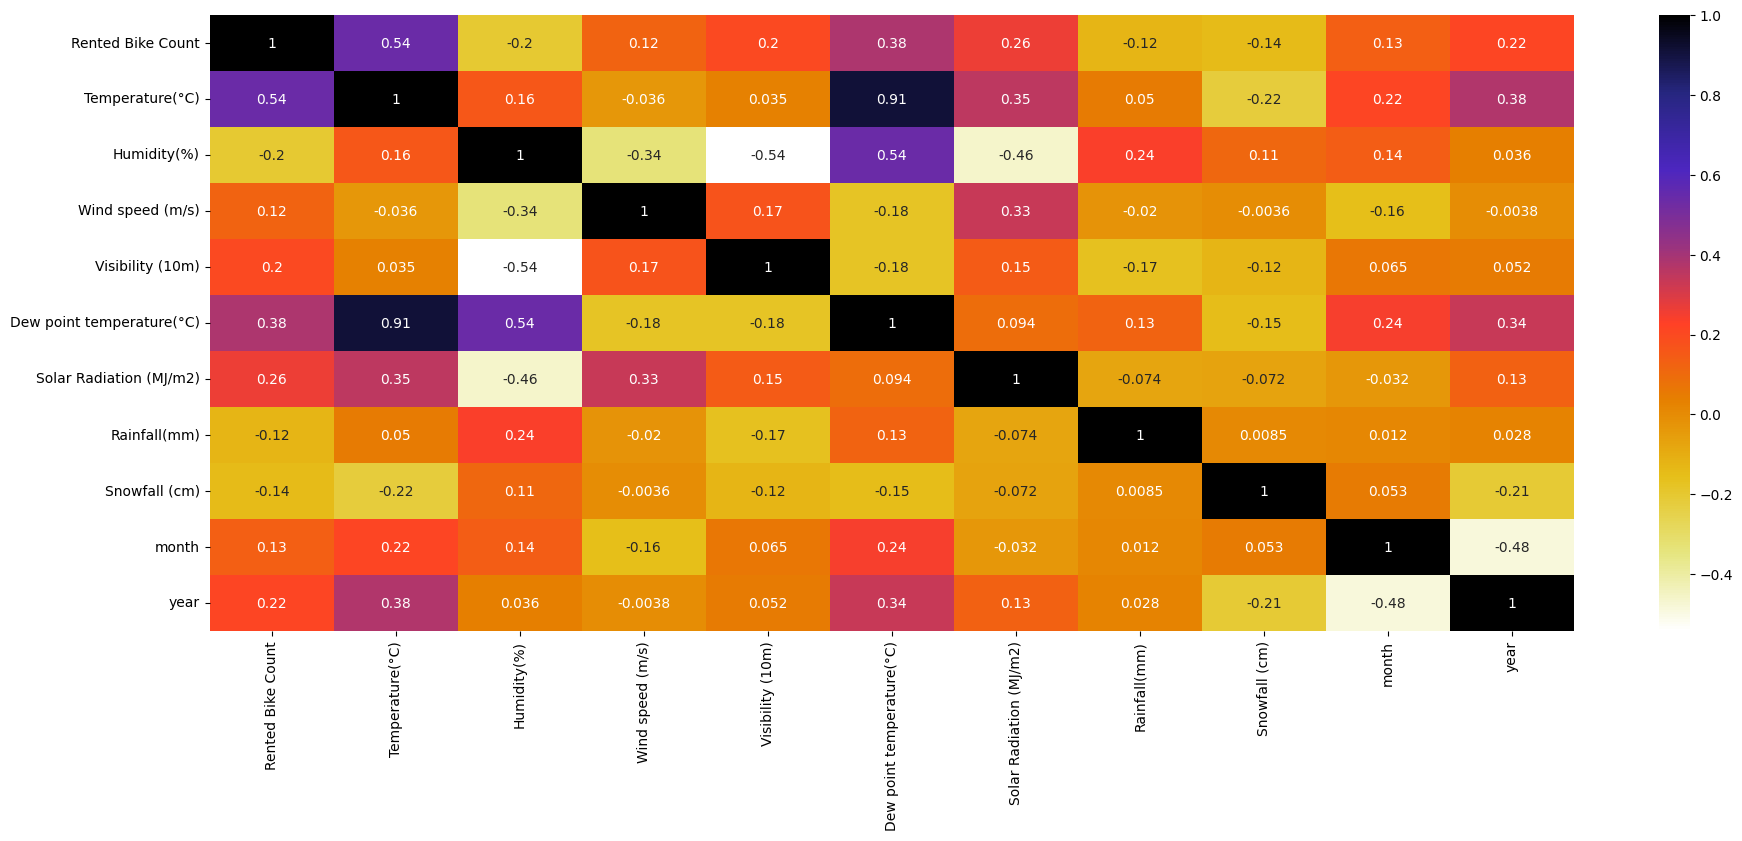

In [130]:
# Check the correlation using heatmap on data set
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(22,8))
cor = int_columns_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

#### **Checking for Variacian Inflation(VIF)**

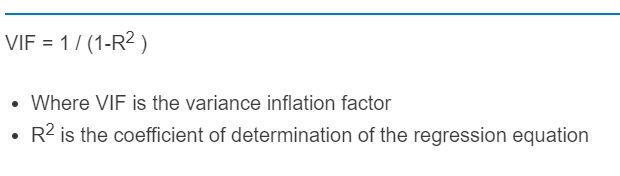

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns

    # Ensure X contains only numeric data before calculating VIF
    X_numeric = X.select_dtypes(include=['number'])

    vif["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

    return(vif)

# Select only numeric columns for VIF calculation
numeric_columns = [i for i in df.columns if i not in ['Rented Bike Count'] and pd.api.types.is_numeric_dtype(df[i])]
calc_vif(df[numeric_columns])

variables         VIF
0            Temperature(°C)  187.610822
1                Humidity(%)  186.723617
2           Wind speed (m/s)    4.598794
3           Visibility (10m)   10.439804
4  Dew point temperature(°C)  126.711486
5    Solar Radiation (MJ/m2)    2.833409
6               Rainfall(mm)    1.100514
7              Snowfall (cm)    1.137576
8                      month    5.101070
9                       year  396.104326

In [133]:

# Select only numeric columns for VIF calculation, excluding specified columns
numeric_columns = [i for i in df.columns if i not in ['Rented Bike Count', 'Dew point temperature(°C)', 'year'] and pd.api.types.is_numeric_dtype(df[i])]

# Calculate VIF for the selected columns
calc_vif(df[numeric_columns])

variables       VIF
0          Temperature(°C)  3.234299
1              Humidity(%)  5.980092
2         Wind speed (m/s)  4.100200
3         Visibility (10m)  5.113220
4  Solar Radiation (MJ/m2)  2.253191
5             Rainfall(mm)  1.078989
6            Snowfall (cm)  1.129930
7                    month  4.963612

## **MaChine Learning**

## **Data Pre-processing**

### **Feature Scaling**

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day_of_week                8760 non-null   objec

In [135]:
new_df = pd.get_dummies(df,drop_first=True,sparse=True)
new_df.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  month  ...  Seasons_Winter  \
0           0.0            0.0     12  ...            True   
1           0.0            0.0     12  ...            True   
2           0.0            0.0     12  ...            True   
3           0.0            0.0     12  ...            True   
4           0.0            0.0     12  ...            True   

   Holiday_No Holiday  Functioning Day_Yes  day_of_week_Monday  \
0                True                 True               False   
1                True                 True               False   
2                True                 True               False   
3                True                 True               False   
4                True                 True               False   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                 False               False                 False   
1                 False               False                 False   
2                 False               False                 False   
3                 False               False                 False   
4                 False               False                 False   

   day_of_week_Tuesday  day_of_week_Wednesday  week_weekend  
0                False                  False         False  
1                False                  False         False  
2                False                  False         False  
3                False                  False         False  
4                False                  False         False  

[5 rows x 26 columns]

In [136]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   Rented Bike Count          8760 non-null   int64              
 1   Temperature(°C)            8760 non-null   float64            
 2   Humidity(%)                8760 non-null   int64              
 3   Wind speed (m/s)           8760 non-null   float64            
 4   Visibility (10m)           8760 non-null   int64              
 5   Dew point temperature(°C)  8760 non-null   float64            
 6   Solar Radiation (MJ/m2)    8760 non-null   float64            
 7   Rainfall(mm)               8760 non-null   float64            
 8   Snowfall (cm)              8760 non-null   float64            
 9   month                      8760 non-null   int32              
 10  year                       8760 non-null   int32              
 11  Hour

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [138]:
x = new_df.drop('Rented Bike Count',axis=1)
y = new_df['Rented Bike Count']

In [139]:
# Train test split our data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [140]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7008, 25)
(1752, 25)
(7008,)
(1752,)


In [141]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]

In [142]:
def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')


  # Here we appending the parameters for all models
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### **Linear Regression**

Training score  = 0.6161800021373173
MAE : 312.34900387940667
MSE : 168594.3338383896
RMSE : 410.60240359548504
R2 : 0.5953537591851021
Adjusted R2 :  0.5894927186170995 

********************************************************************************
coefficient 
 [ 2.32196581e+01 -8.54103784e+00  1.22134290e+01  5.03911612e-03
  3.77481629e+00 -1.49712241e+01 -6.08411440e+01  2.08877737e+01
 -4.78762147e+01 -5.99527010e+02 -3.18092889e+02 -6.28463013e+02
 -5.02996004e+02 -4.43657875e+02 -3.24767623e+02 -7.86222390e+02
  1.37158359e+02  9.56460041e+02 -4.93214986e+01  2.07454180e+00
 -6.46913282e+01 -1.14873967e+01 -1.41600722e+01  9.38532418e+00
 -6.26167863e+01]


Intercept  =  1210738.3081206612


******************** ploting the graph of Actual and predicted only with 80 observation ********************


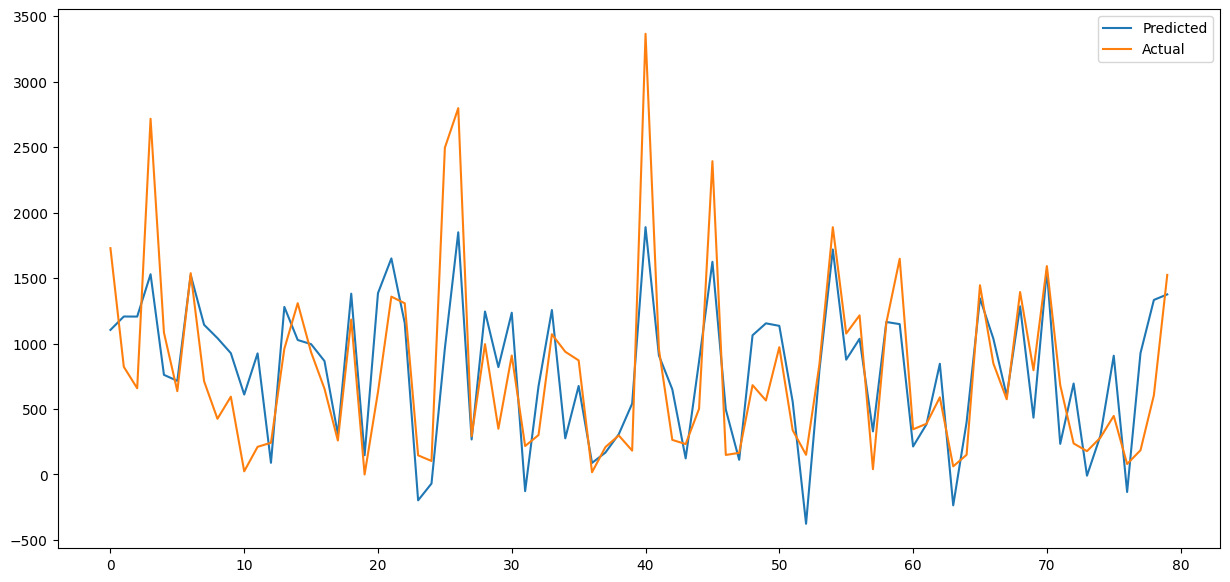

In [143]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

### **Lasso with hyperparameter tuning**

In [144]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5)

Training score  = 0.6161344528031308
The best parameters found out to be :{'alpha': 0.1} 
where model best score is:  0.611889324542579 

MAE : 312.1013004583713
MSE : 168426.68240873917
RMSE : 410.3981998117672
R2 : 0.5957561423449083
Adjusted R2 :  0.5899009300382008 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


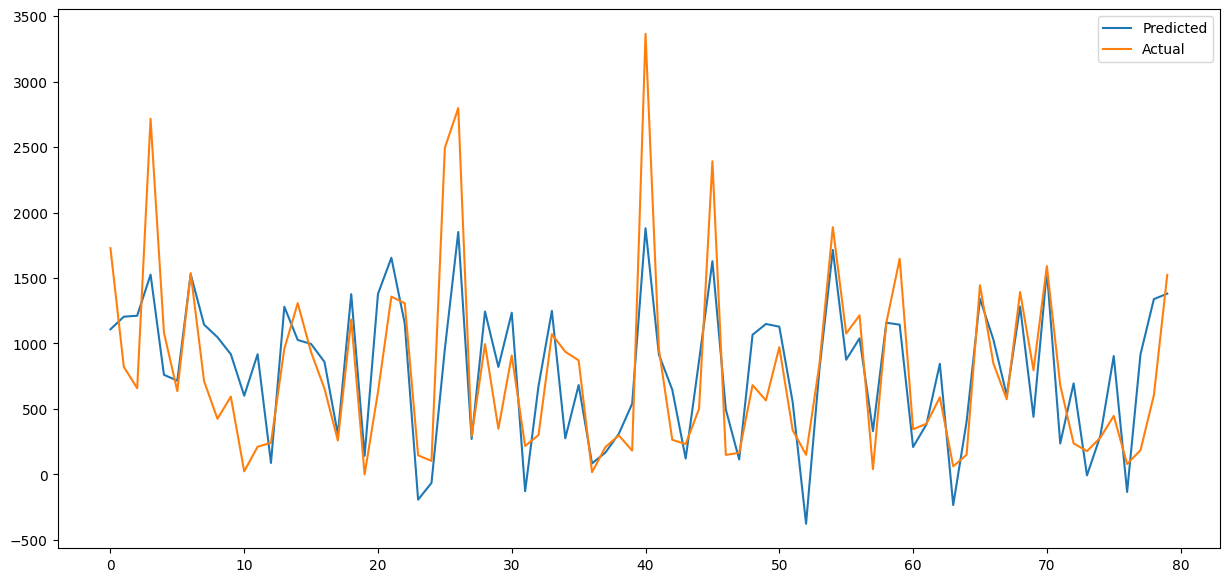

In [145]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

### **Ridge with hyperparameter tuning**

In [146]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
 # fit and evaluate model with score_matrix function

Training score  = 0.6161730905077116
The best parameters found out to be :{'alpha': 0.5} 
where model best score is:  0.6118861753152965 

MAE : 312.23984261766
MSE : 168518.12329782842
RMSE : 410.50958977571815
R2 : 0.595536673450644
Adjusted R2 :  0.5896782822781446 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


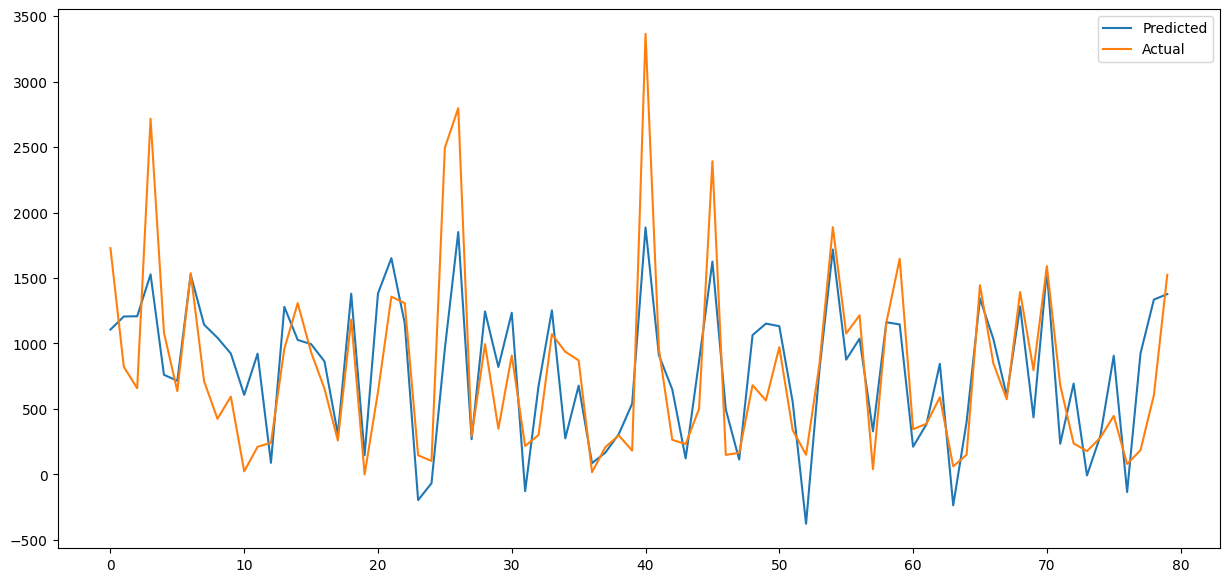

In [147]:
score_metrix(L2_cv,x_train,x_test,y_train,y_test)

### **Polynomial**

In [148]:
poly = PolynomialFeatures(degree = 2)
poly_X_train = poly.fit_transform(x_train)
poly_X_test = poly.fit_transform(x_test)

#### **LinearRegression**

Training score  = 0.8201374837907731
MAE : 209.12063933975998
MSE : 90405.31874515013
RMSE : 300.6747723789778
R2 : 0.7830165964239084
Adjusted R2 :  0.728615757384474 

********************************************************************************
coefficient 
 [-3.77579598e-01  5.96529024e+05  1.44441491e+05  4.72994008e+04
 -6.15431118e+02 -6.57020753e+05 -3.68223654e+05 -7.14636710e+05
  4.05221843e+05 -5.21252355e-05  3.92397183e-03 -3.31765786e+05
 -3.82364092e+05  5.38434121e+04 -2.12869094e-03  1.47340522e-03
  3.46064119e-03 -2.14288921e+06  9.59089634e-04 -3.32365799e+05
  1.73495903e+05 -2.07158872e+05  5.15966243e+05  8.99279012e+04
  1.95340215e+05 -3.36629696e+04  9.85960372e-01  9.39284228e-02
 -5.22916989e-01  2.72484305e-02 -1.78715279e+00  8.73965041e-01
 -2.44196764e+02  1.13999358e+01 -2.56991792e+01 -2.95507185e+02
  1.05226963e+01  3.37235809e+01  2.60594403e+01 -1.79994125e+02
 -2.24708401e+02 -2.48733711e+02 -1.52622729e+01  4.46073402e+01
  1.92545734e+01 -2.

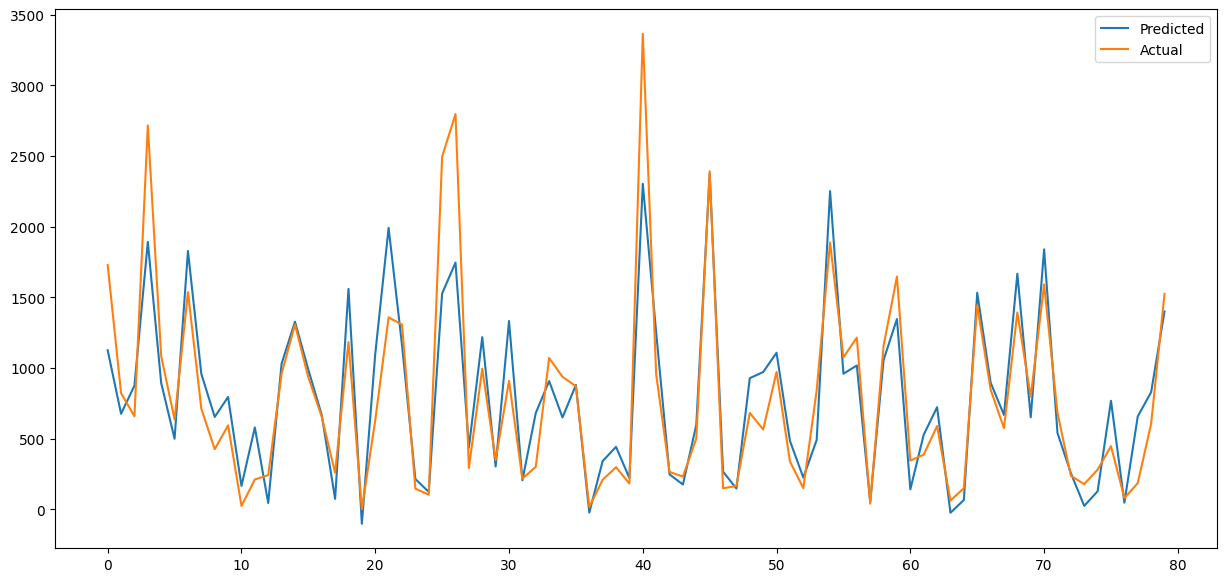

In [149]:
score_metrix(LinearRegression(), poly_X_train,poly_X_test,y_train,y_test)

In [150]:
new_df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'year', 'Hour_Morning', 'Hour_Night', 'Hour_Noon', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'week_weekend'],
      dtype='object')

In [151]:
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV
from xgboost import XGBRegressor


In [152]:
new_x = new_df.drop('Rented Bike Count',axis=1)
new_y = new_df['Rented Bike Count']

In [153]:
x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size=0.25,random_state=42)

In [154]:
robust_scaler = RobustScaler()
x_train_robust = robust_scaler.fit_transform(x_train)
x_test_robust = robust_scaler.transform(x_test)


In [155]:
scaler = PowerTransformer()
scaler = PowerTransformer(method='yeo-johnson')
x_train = scaler.fit_transform(x_train_robust)
x_test = scaler.transform(x_test_robust)

### **XGBoost Regression**

In [156]:
params = {'learning_rate':[0.5,1,1.5,2],'n_estimators':[80,100,150],'max_depth':[15,20,30]}
xgb_grid_search= GridSearchCV(XGBRegressor(),param_grid=params,)


Training score  = 1.0
The best parameters found out to be :{'learning_rate': 0.5, 'max_depth': 15, 'n_estimators': 80} 
where model best score is:  0.8414999842643738 

MAE : 167.2757626965659
MSE : 70194.69895470886
RMSE : 264.9428220479069
R2 : 0.8284590840339661
Adjusted R2 :  0.8264773266868538 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


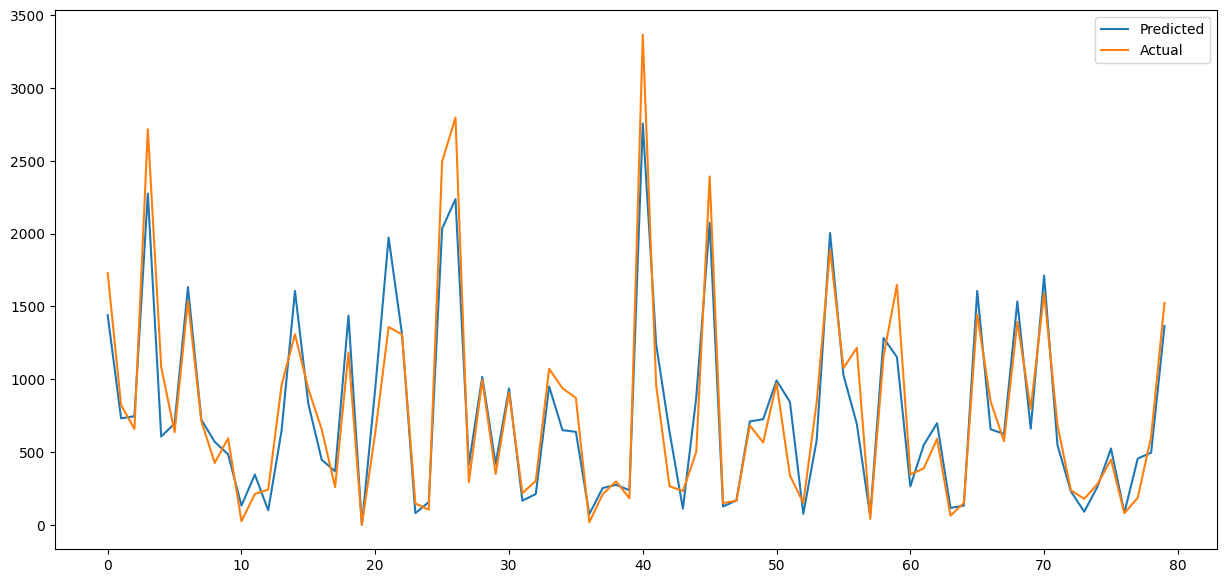

In [157]:
score_metrix(xgb_grid_search,x_train,x_test,y_train,y_test)

### **KNN Regressor**

Training score  = 0.8710611216709062
MAE : 197.63543378995433
MSE : 92296.0585936073
RMSE : 303.8026639014334
R2 : 0.7744481015826759
Adjusted R2 :  0.771842372626838 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


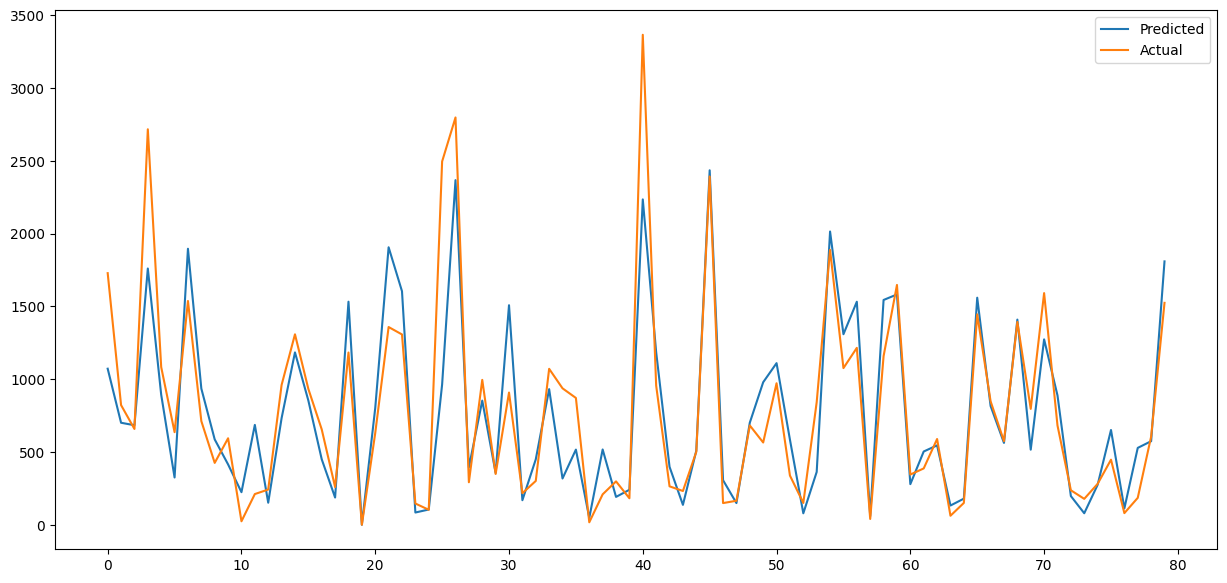

In [158]:
knn = KNeighborsRegressor()
score_metrix(knn,x_train,x_test,y_train,y_test)

### **Using Random Forest Regressor**

In [159]:
# parameters for Random forest
param_grid = {"n_estimators":[50,100,150],
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Training score  = 0.9533872609008069
The best parameters found out to be :{'max_depth': 20, 'max_features': 40, 'min_samples_split': 10, 'n_estimators': 150} 
where model best score is:  0.8588356411698698 

MAE : 155.00483497710778
MSE : 57571.72853881632
RMSE : 239.94109389351445
R2 : 0.85930696429548
Adjusted R2 :  0.8576815826445499 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


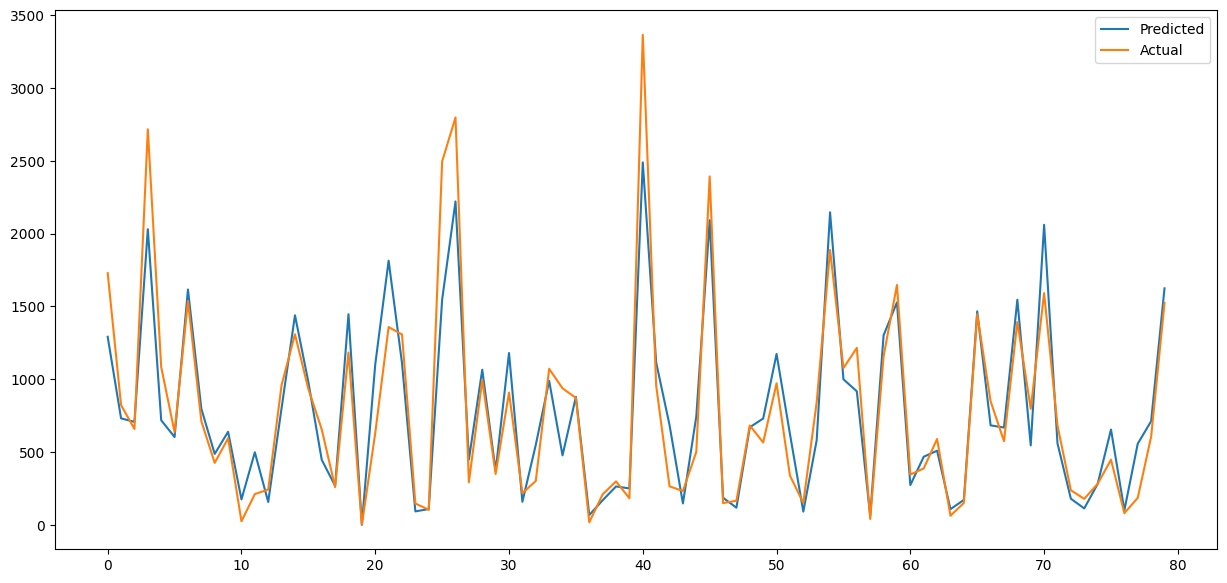

In [160]:
# Using Grid SearchCV
Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,verbose=2)
score_metrix(Ranom_forest_Grid_search,x_train,x_test,y_train,y_test)

### **Gradient Boosting Regressor**

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Training score  = 0.9973727898258731
The best parameters found out to be :{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150} 
where model best score is:  0.865177764054404 

MAE : 151.9388035915845
MSE : 57377.71590733932
RMSE : 239.53646049680896
R2 : 0.8597810898216767
Adjusted R2 :  0.8581611855913356 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


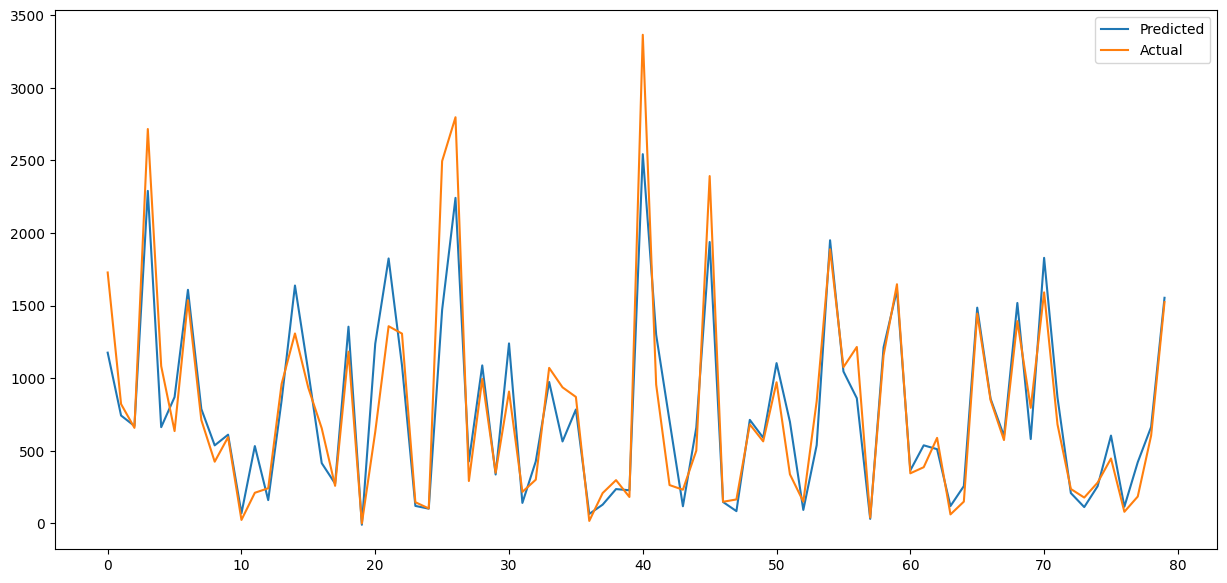

In [162]:
param_grid = {'learning_rate':[0.15,0.1,0.05,0.02,0.20],
              'n_estimators':[100,150,200,250],
              'max_depth':[2,4,6,10]}

gradient_boost_grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, n_jobs=-1, verbose=2)
score_metrix(gradient_boost_grid_search,x_train,x_test,y_train,y_test)

### **Adaboost Boost Regressor**

Training score  = 0.998076829297644
The best parameters found out to be :{'estimator': DecisionTreeRegressor(), 'learning_rate': 1.5, 'n_estimators': 200} 
where model best score is:  0.8642224553378668 

MAE : 151.42465753424656
MSE : 58315.98812785388
RMSE : 241.48703511338633
R2 : 0.8574881524655852
Adjusted R2 :  0.8558417586632006 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


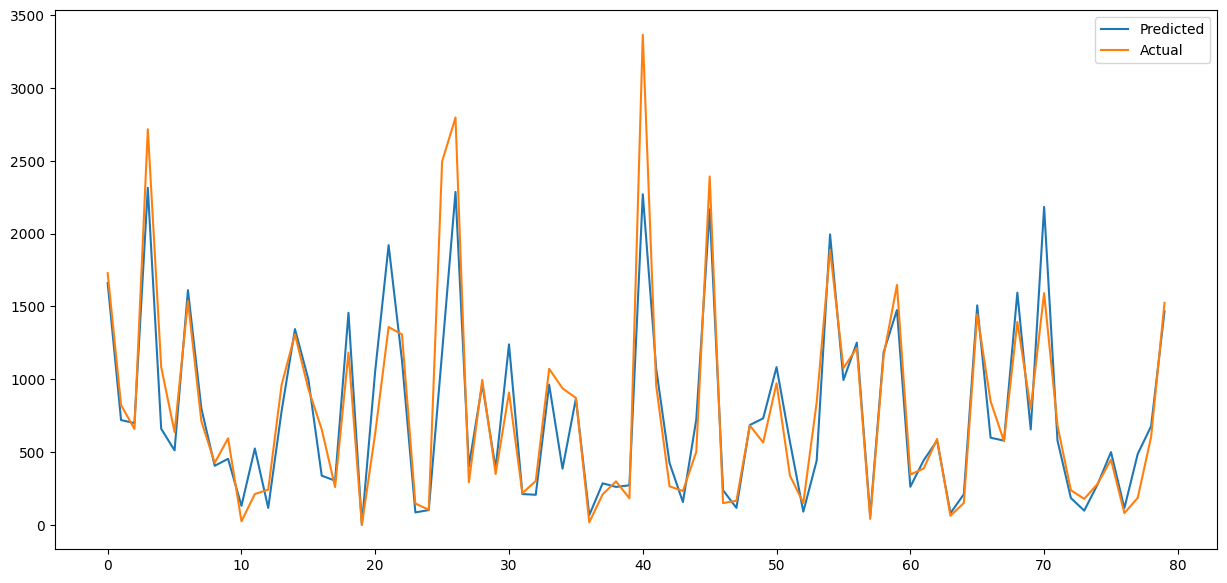

In [165]:
# # parameters for Ada Boost Regressor
param_grid = {'n_estimators': [50,100,150,200],
          'learning_rate':[0.5,1,1.5,2],
          'estimator': [LinearRegression(),DecisionTreeRegressor()]}

Ada_boost_grid_search = GridSearchCV(AdaBoostRegressor(),param_grid=param_grid,n_jobs=-1)
score_metrix(Ada_boost_grid_search,x_train,x_test,y_train,y_test)

In [167]:
model = GridSearchCV(AdaBoostRegressor(),param_grid=param_grid,n_jobs=-1)
model.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'estimator': [LinearRegression(),
                                       DecisionTreeRegressor()],
                         'learning_rate': [0.5, 1, 1.5, 2],
                         'n_estimators': [50, 100, 150, 200]})

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('Bike_shring_pred.sav', 'wb'))